### scipy를 사용한 정규분포의 시뮬레이션

In [64]:
mu = 0
std = 1
rv = sp.stats.norm(mu, std)

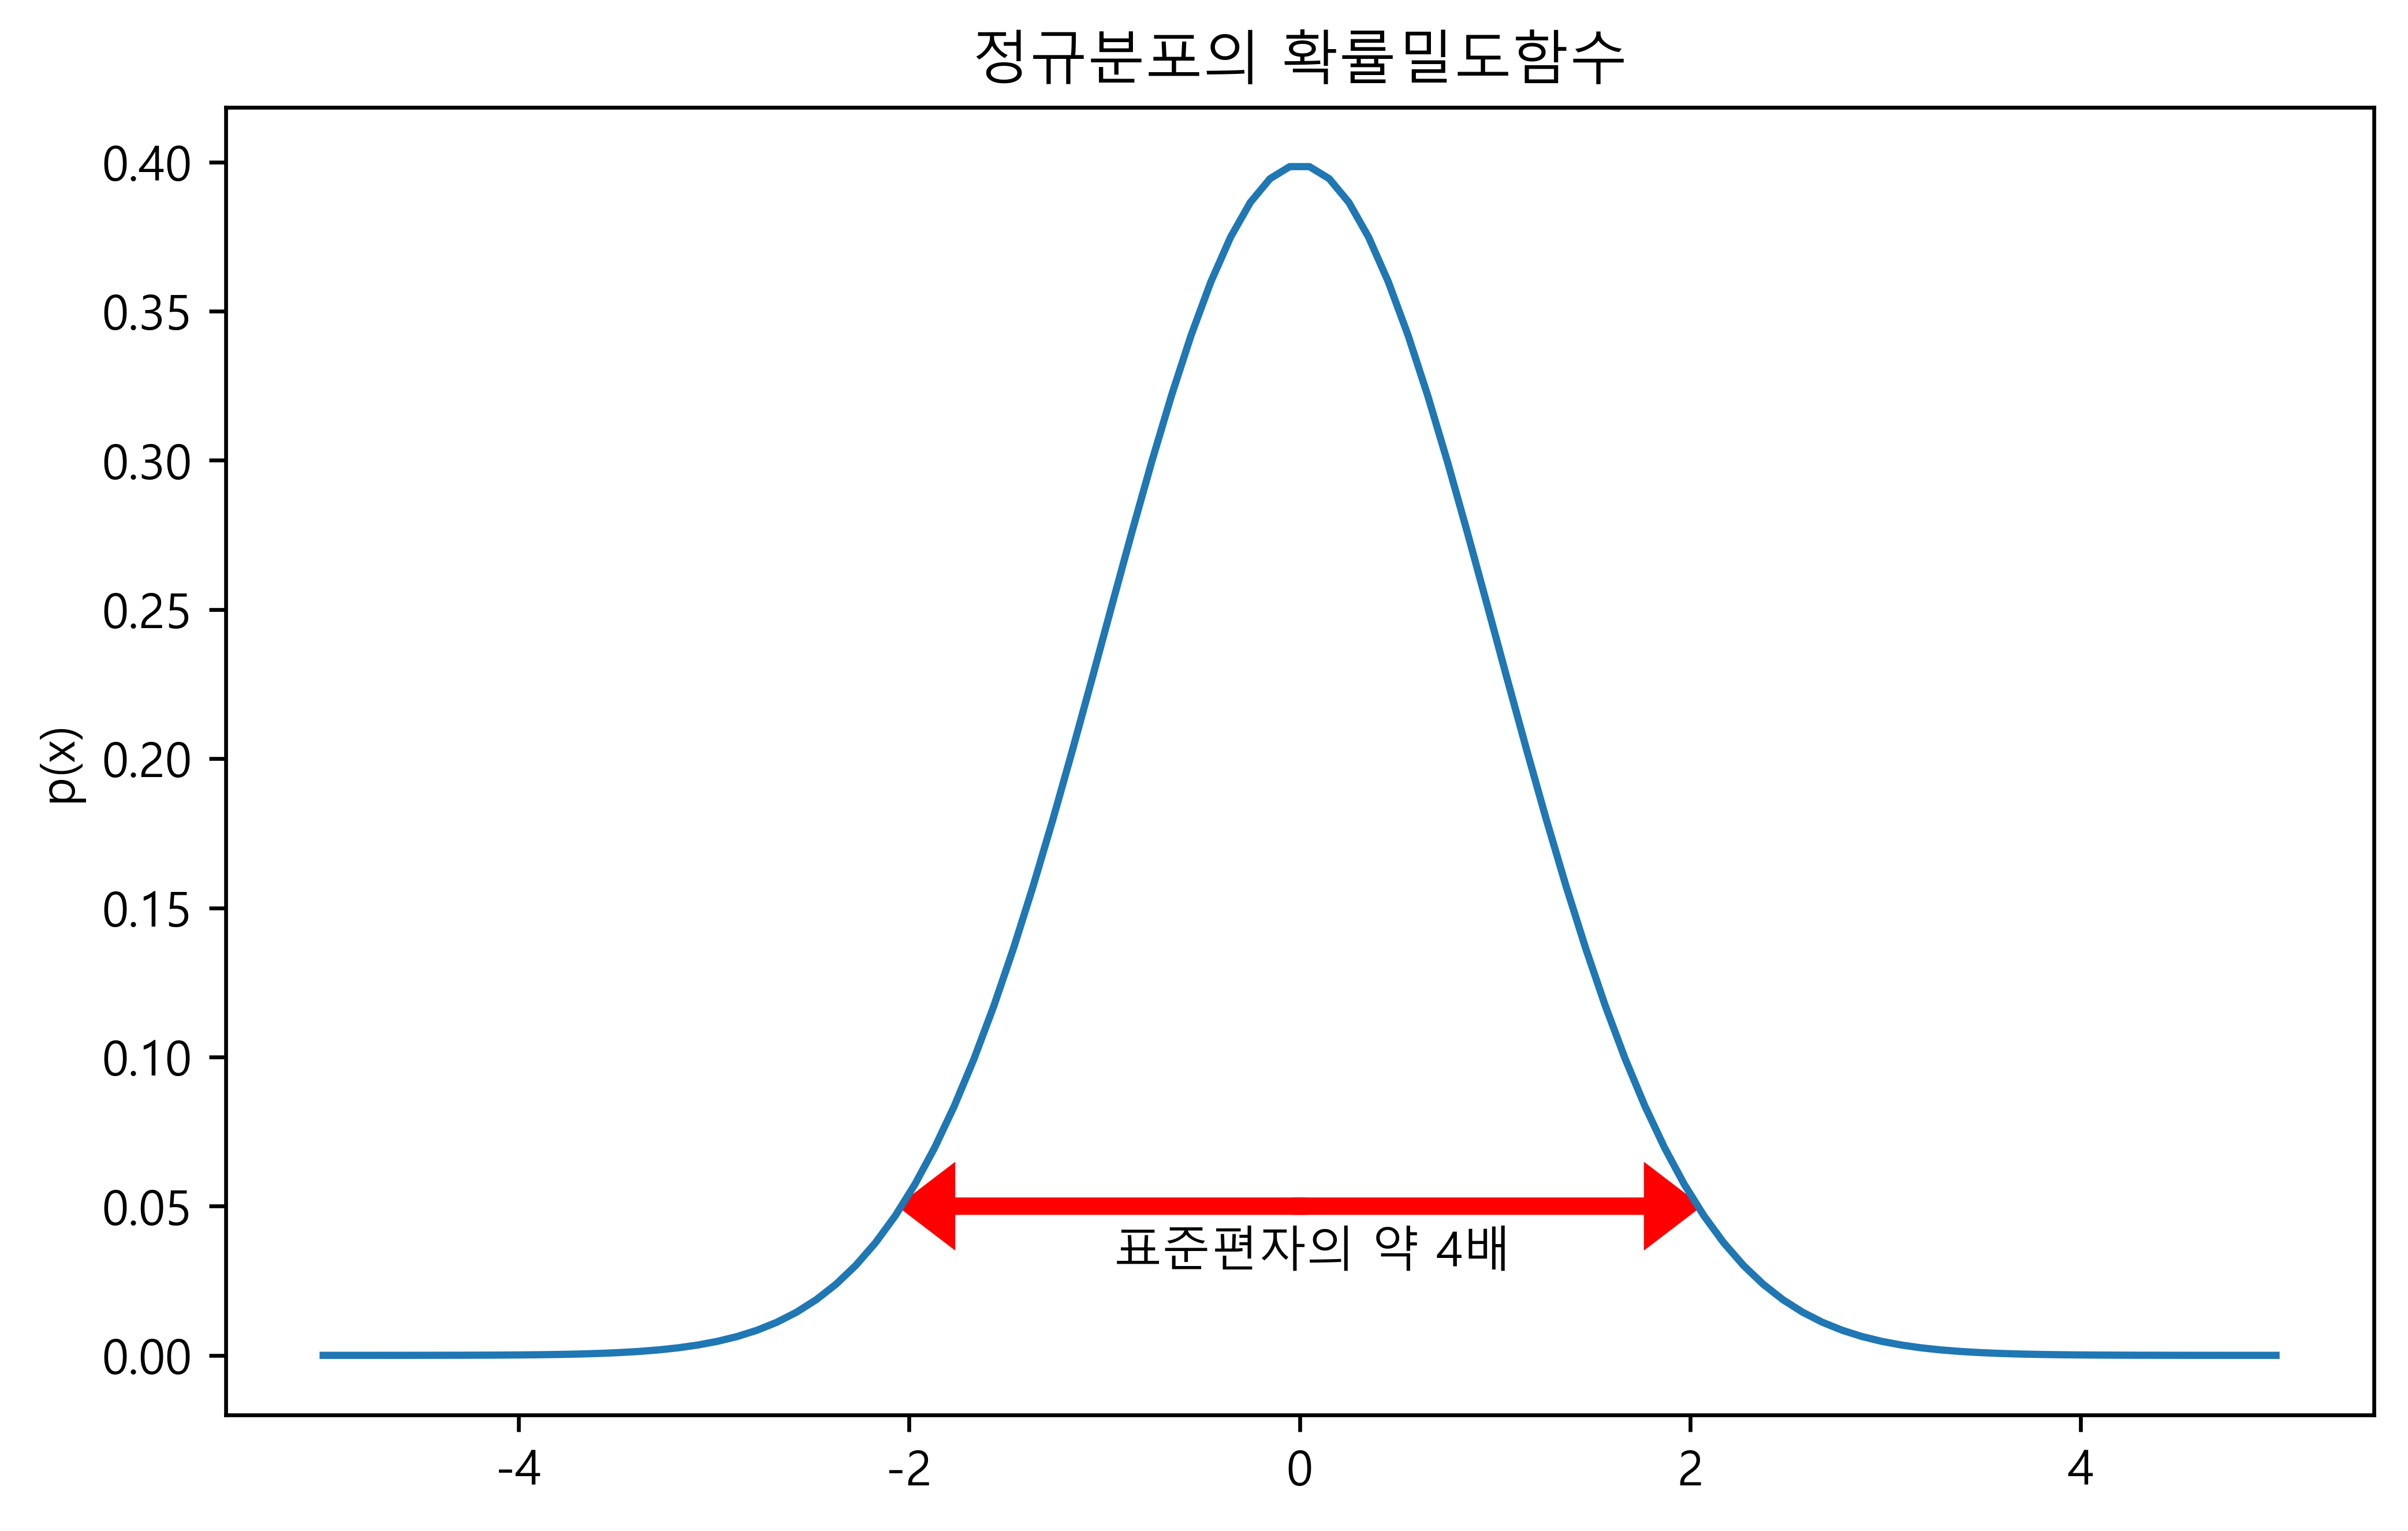

In [65]:
# pdf()를 사용하면 확률밀도함수를 계산할 수 있다.
# 정규분포의 확률밀도함수는 종(bell) 모양의 부드러운 단봉분포다
# 종의 아랫부분이 표준편차의 4배 이상이다.

xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.arrow(0, 0.05, 2, 0, lw = 3, color = 'r',
         head_width=0.02, head_length=0.2, length_includes_head=True)
plt.arrow(0, 0.05, -2, 0, lw = 3, color = 'r',
         head_width=0.02, head_length=0.2, length_includes_head=True)
plt.text(-0.95, 0.03, "표준편자의 약 4배")
plt.ylabel("p(x)")
plt.title("정규분포의 확률밀도함수")
plt.show()

In [66]:
# 시뮬레이션을 통해 표본을 얻으려면 rvs()를 사용한다.
np.random.seed(0)
x = rv.rvs(20)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])

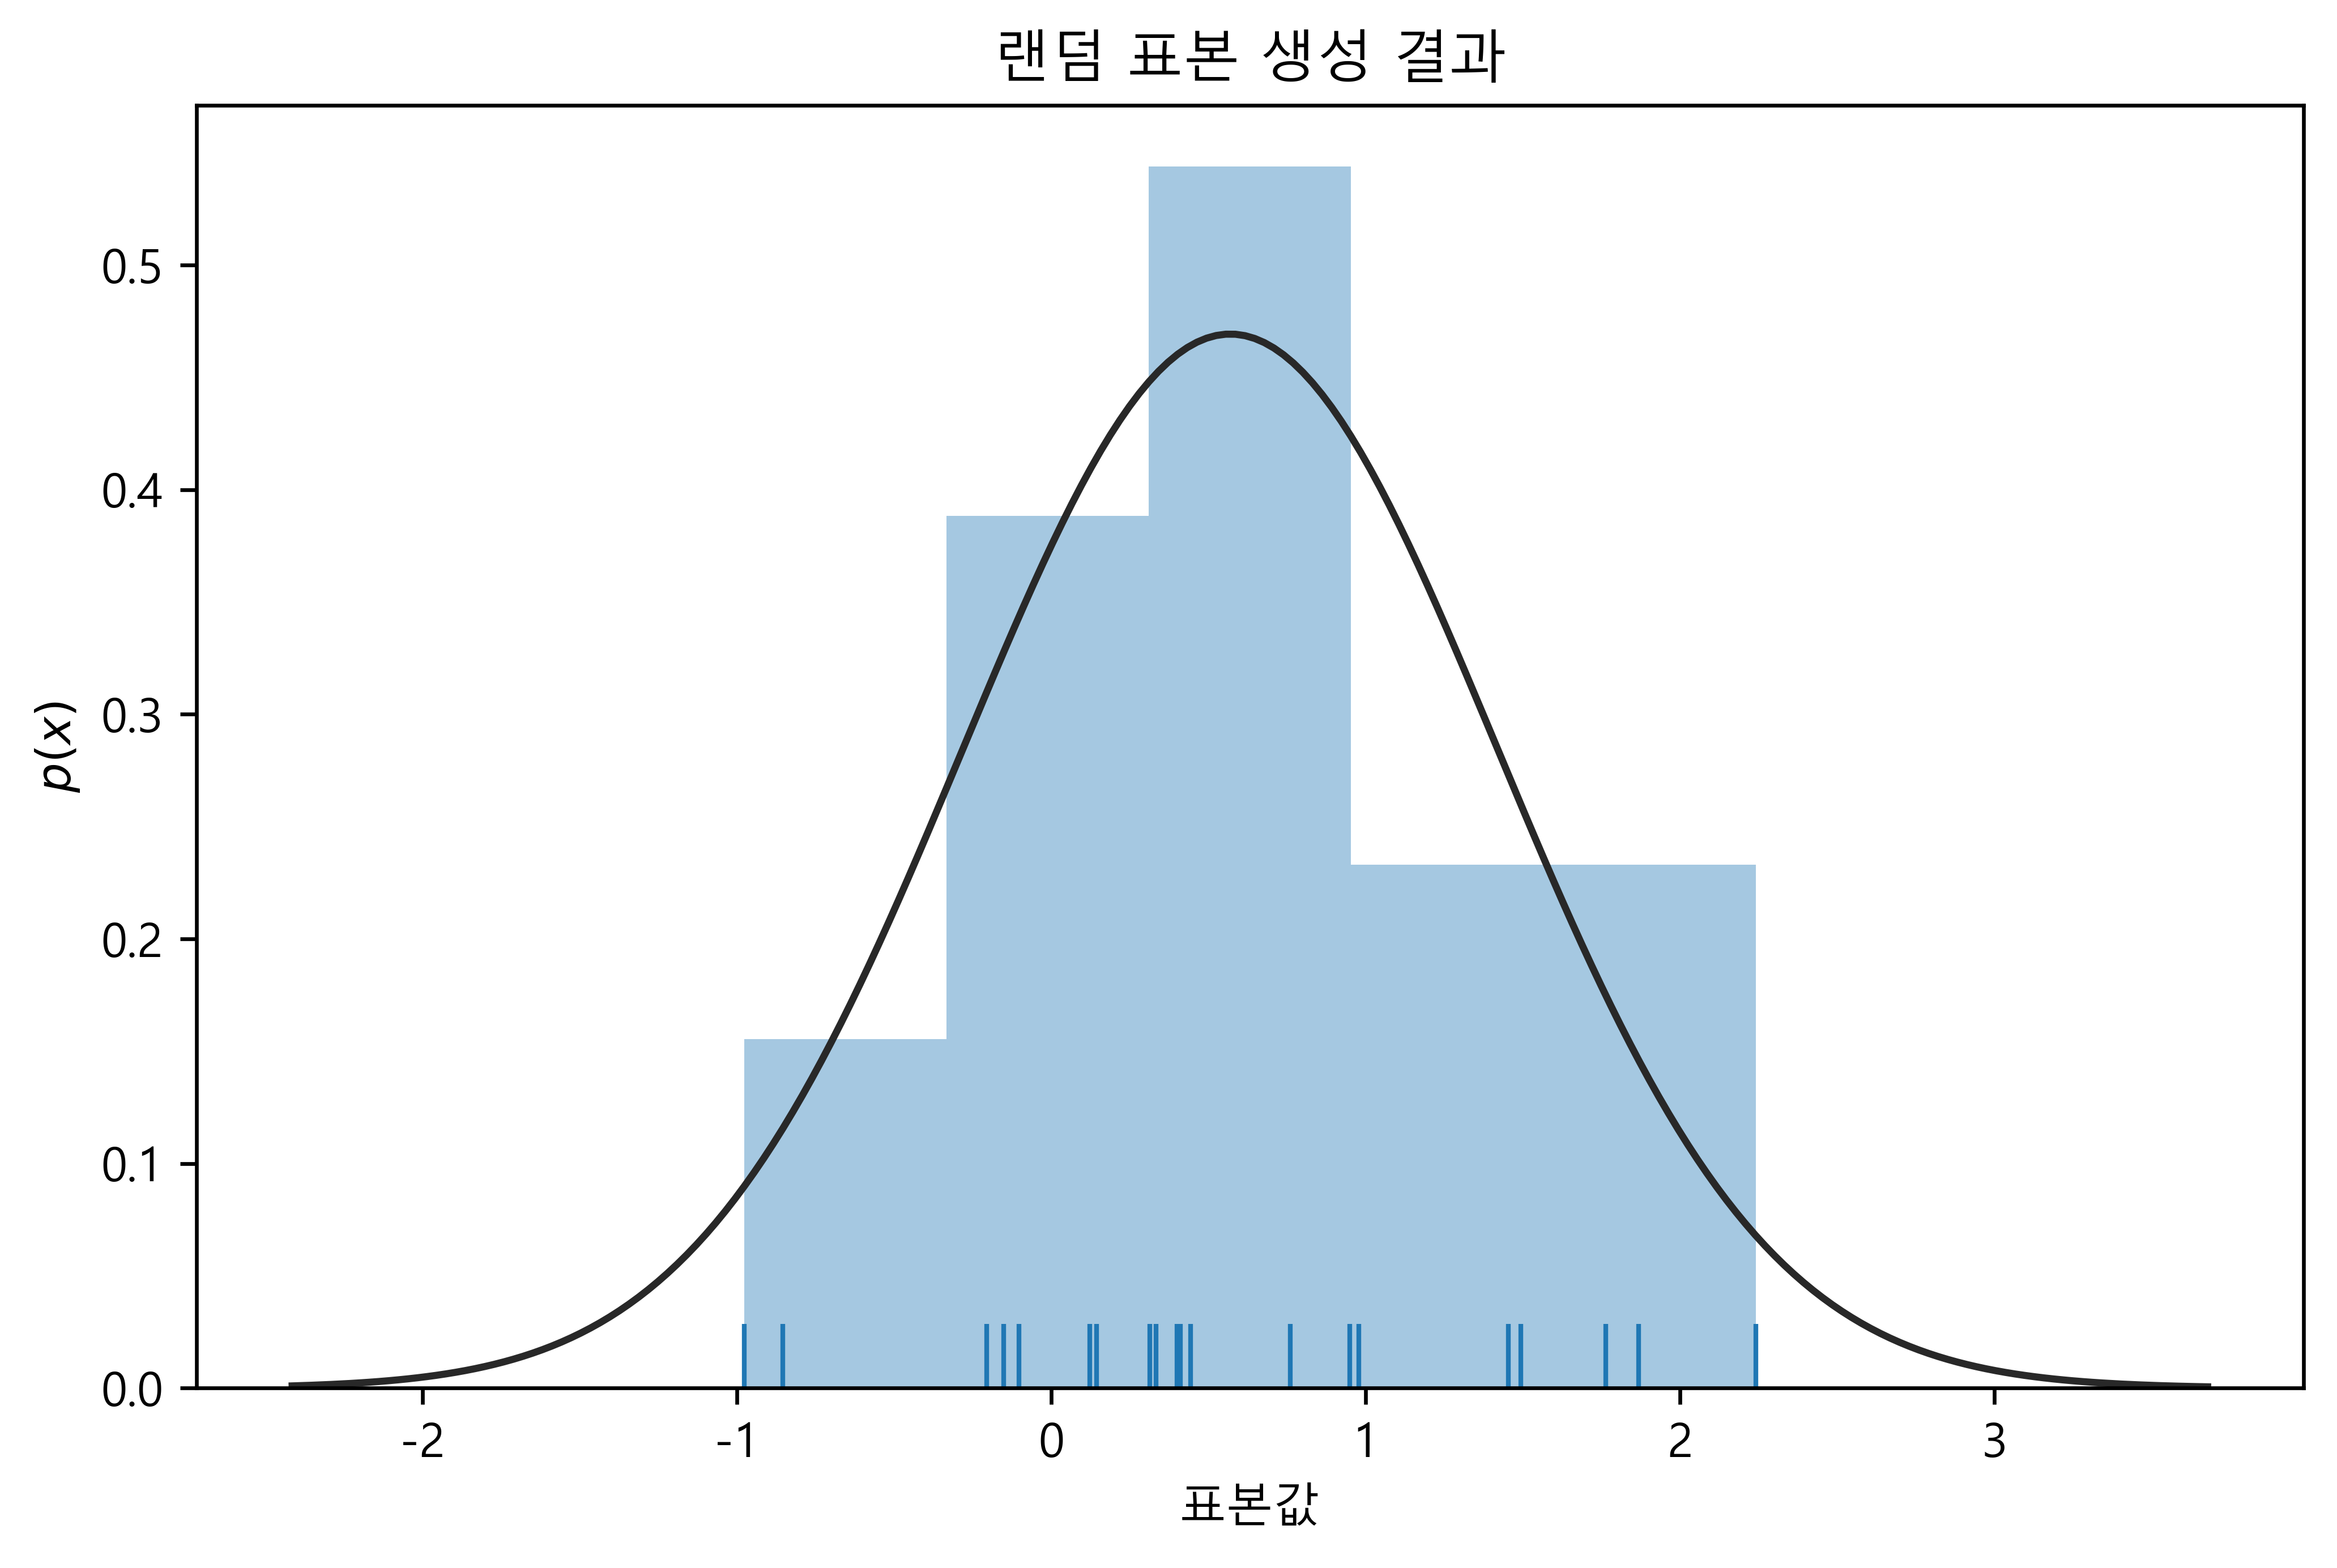

In [67]:
sns.distplot(x, rug=True, kde=False, fit=sp.stats.norm)
plt.title("랜덤 표본 생성 결과")
plt.xlabel("표본값")
plt.ylabel("$p(x)$")
plt.show()

#### 예제: 붓꽃 데이터
다음은 붓꽃 중 특정한 종(setosa)의 꽃잎의 길이에 대한 히스토그램이다.

정규분포와 비슷한 모양을 보인다.

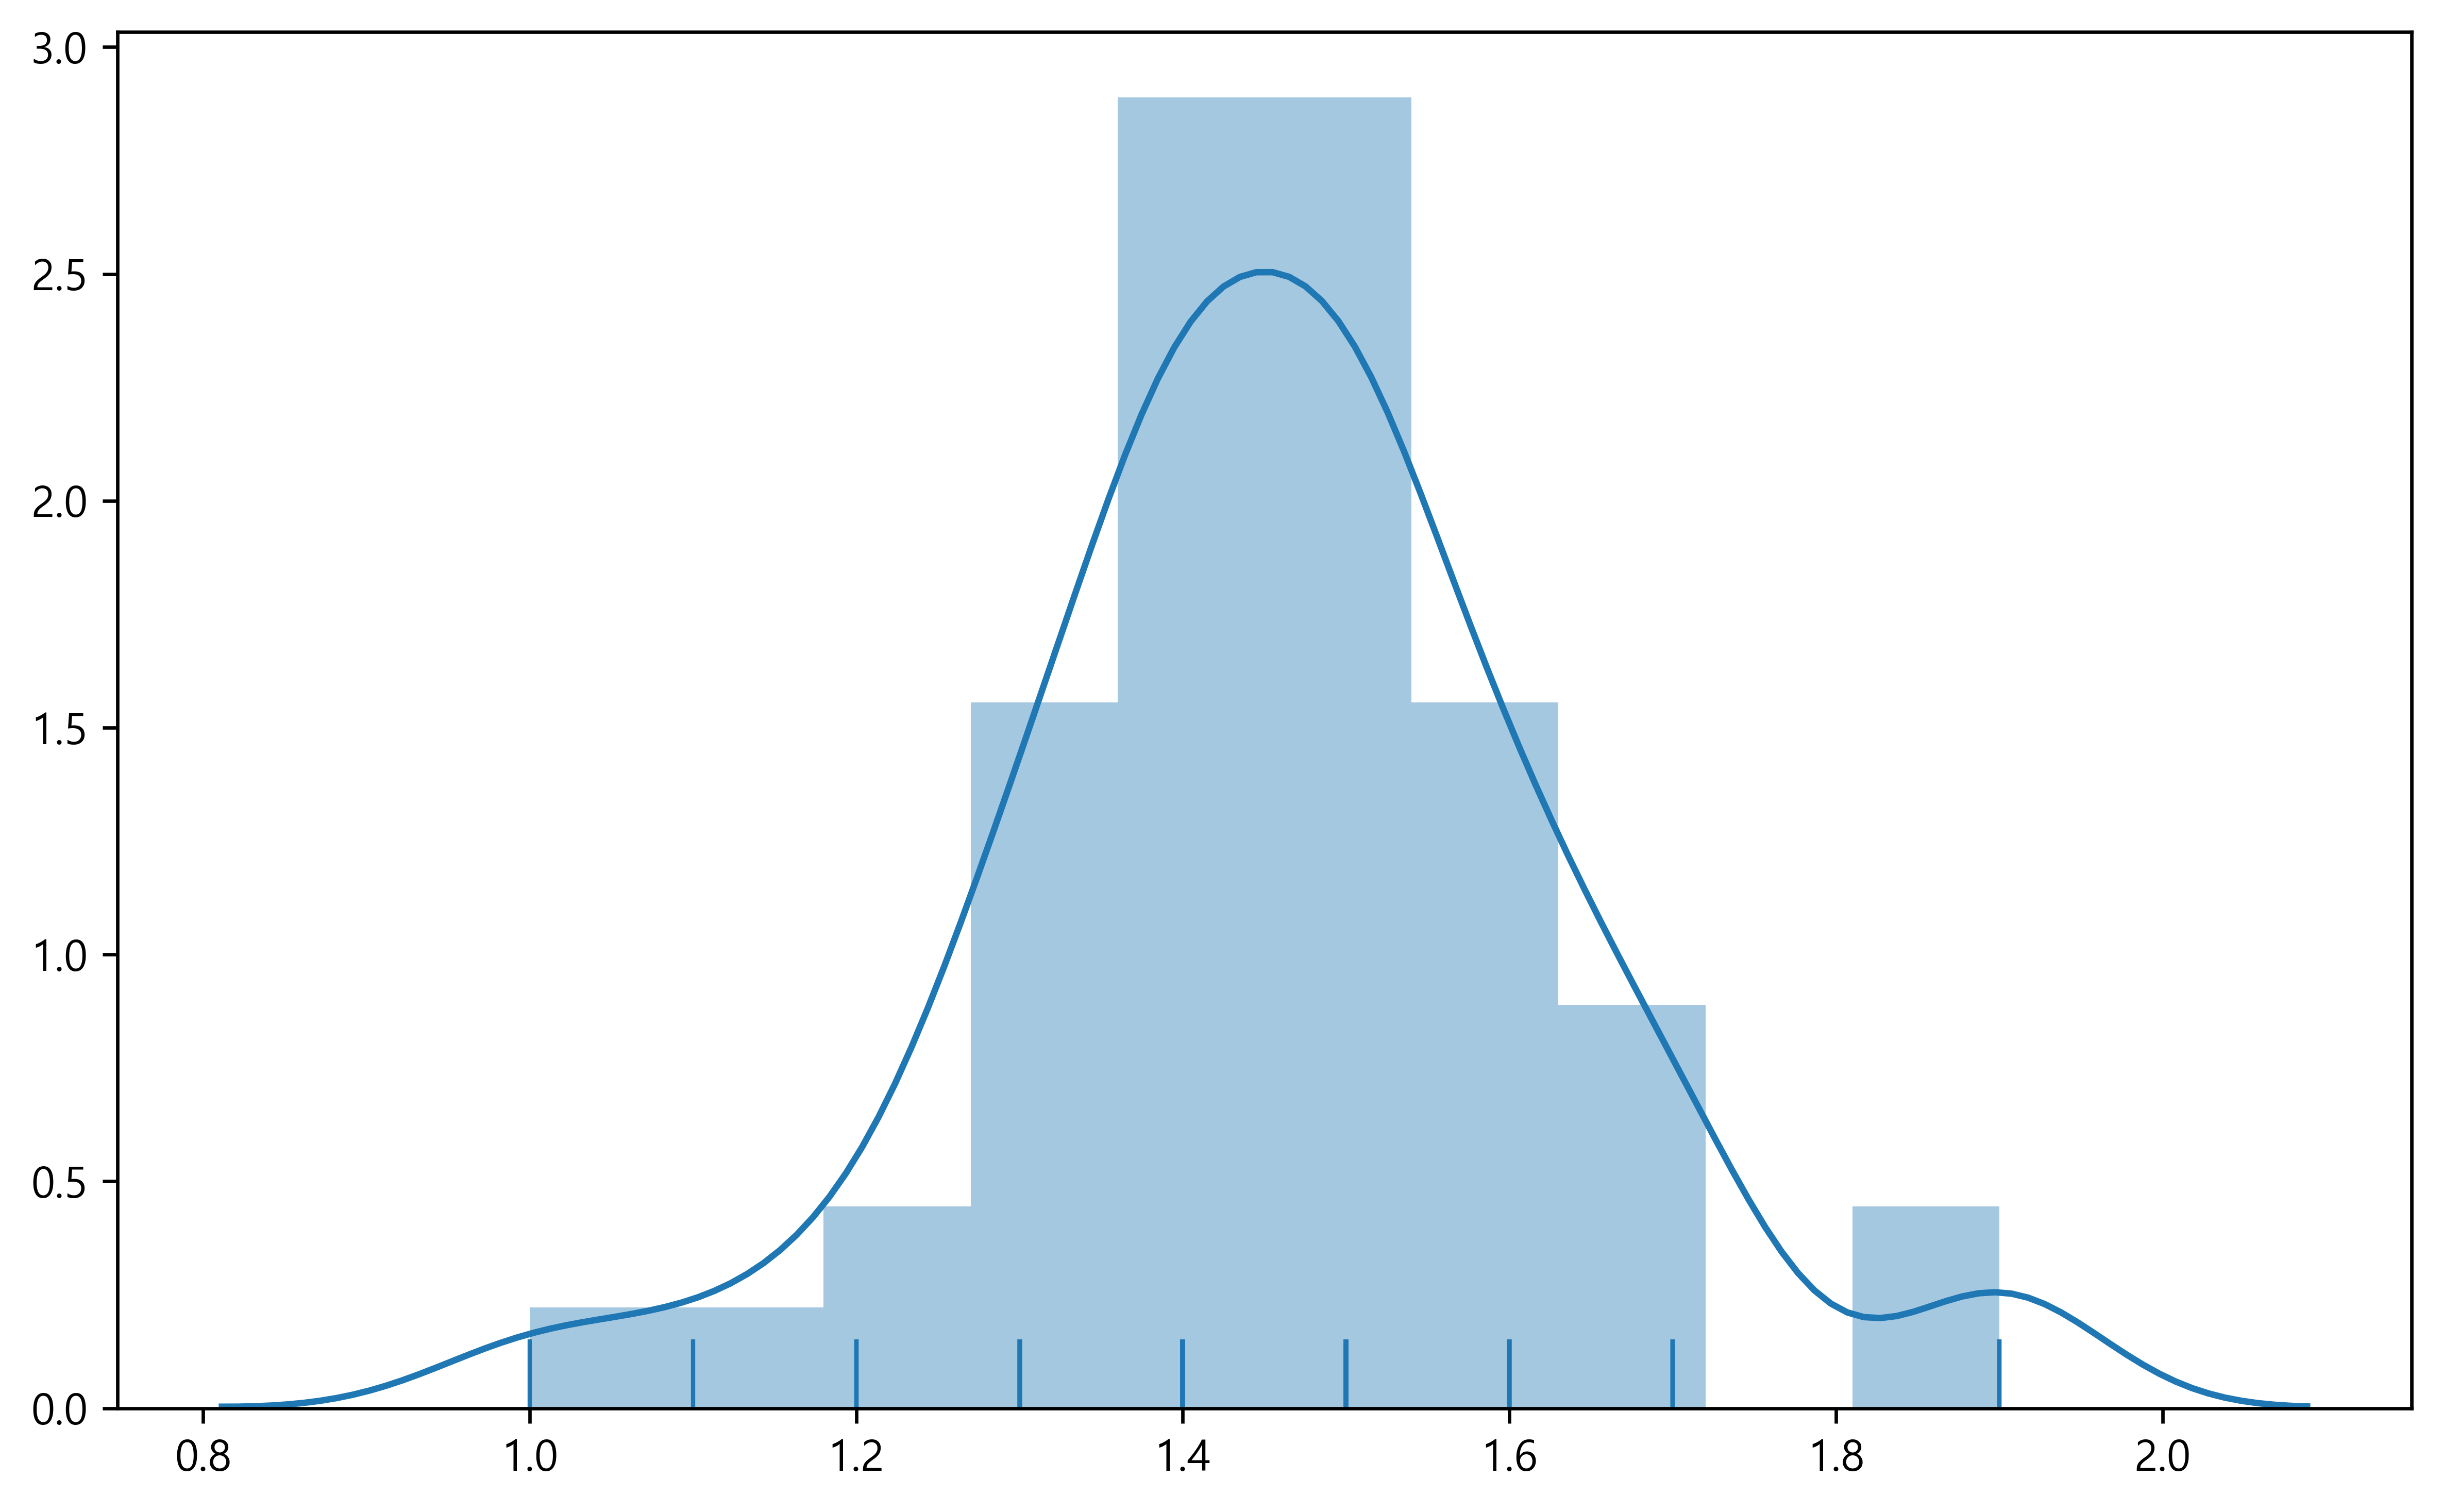

In [68]:
from sklearn.datasets import load_iris

setosa_sepal_length = load_iris().data[:50, 2]
sns.distplot(setosa_sepal_length, rug=True)
plt.tight_layout()
plt.show()

#### 예제: 주식 수익률
다음은 과거 약 10년간의 미국 나스닥(Nasdaq) 주가지수를 그린 것이다.

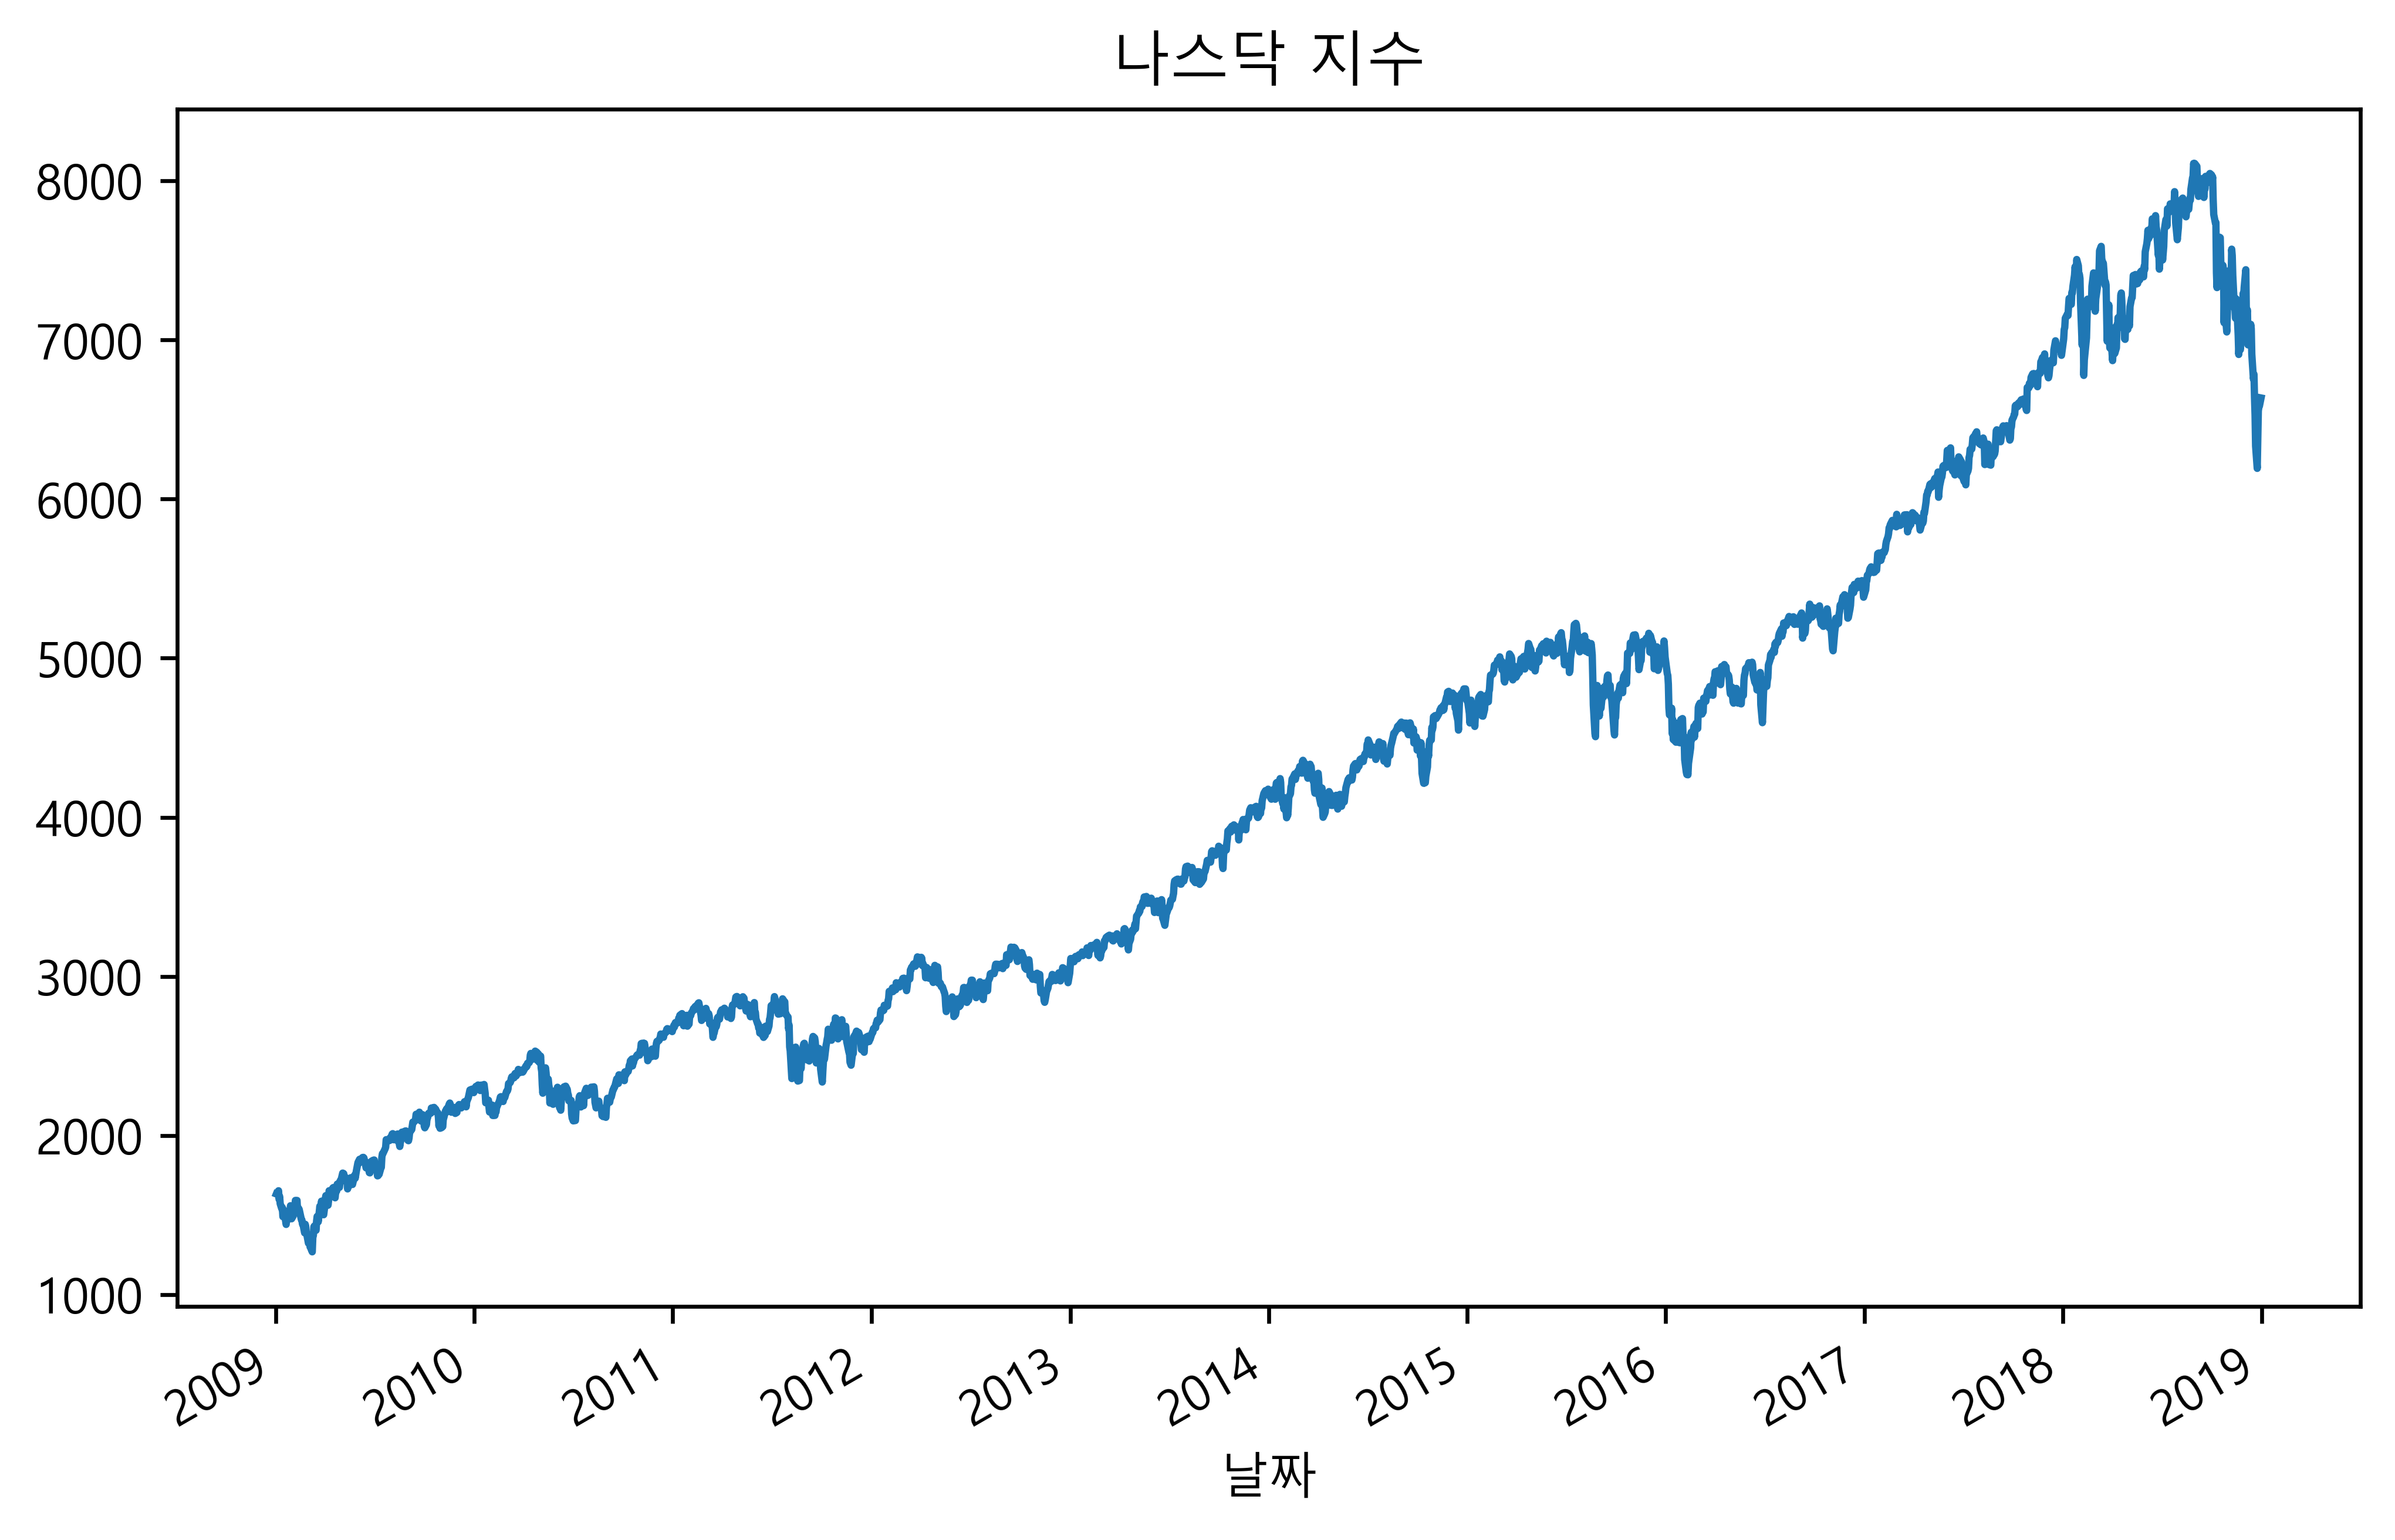

In [69]:
import pandas_datareader.data as web

symbol = "NASDAQCOM"
data = pd.DataFrame()
data[symbol] = web.DataReader(
    symbol, data_source="fred", start="2009-01-01", end="2018-12-31")[symbol]
data = data.dropna()
data.plot(legend=False)
plt.xlabel("날짜")
plt.title("나스닥 지수")
plt.show()

In [70]:
# 10년간의 평균 일간수익률을 계산하면 약 0.06%가 나온다.
# 표준편차는 약 1.17%다
# 주식의 수익률을 표시할 때는 표준편차라는 말 대신 변동성(volatility)이라는 용어 사용
daily_returns = data.pct_change().dropna()
mean = daily_returns.mean().values[0]
std = daily_returns.std().values[0]
print("평균 일간수익률: {:3.2f}%".format(mean * 100))
print("평균 일간변동성: {:3.2f}%".format(std * 100))

평균 일간수익률: 0.06%
평균 일간변동성: 1.17%


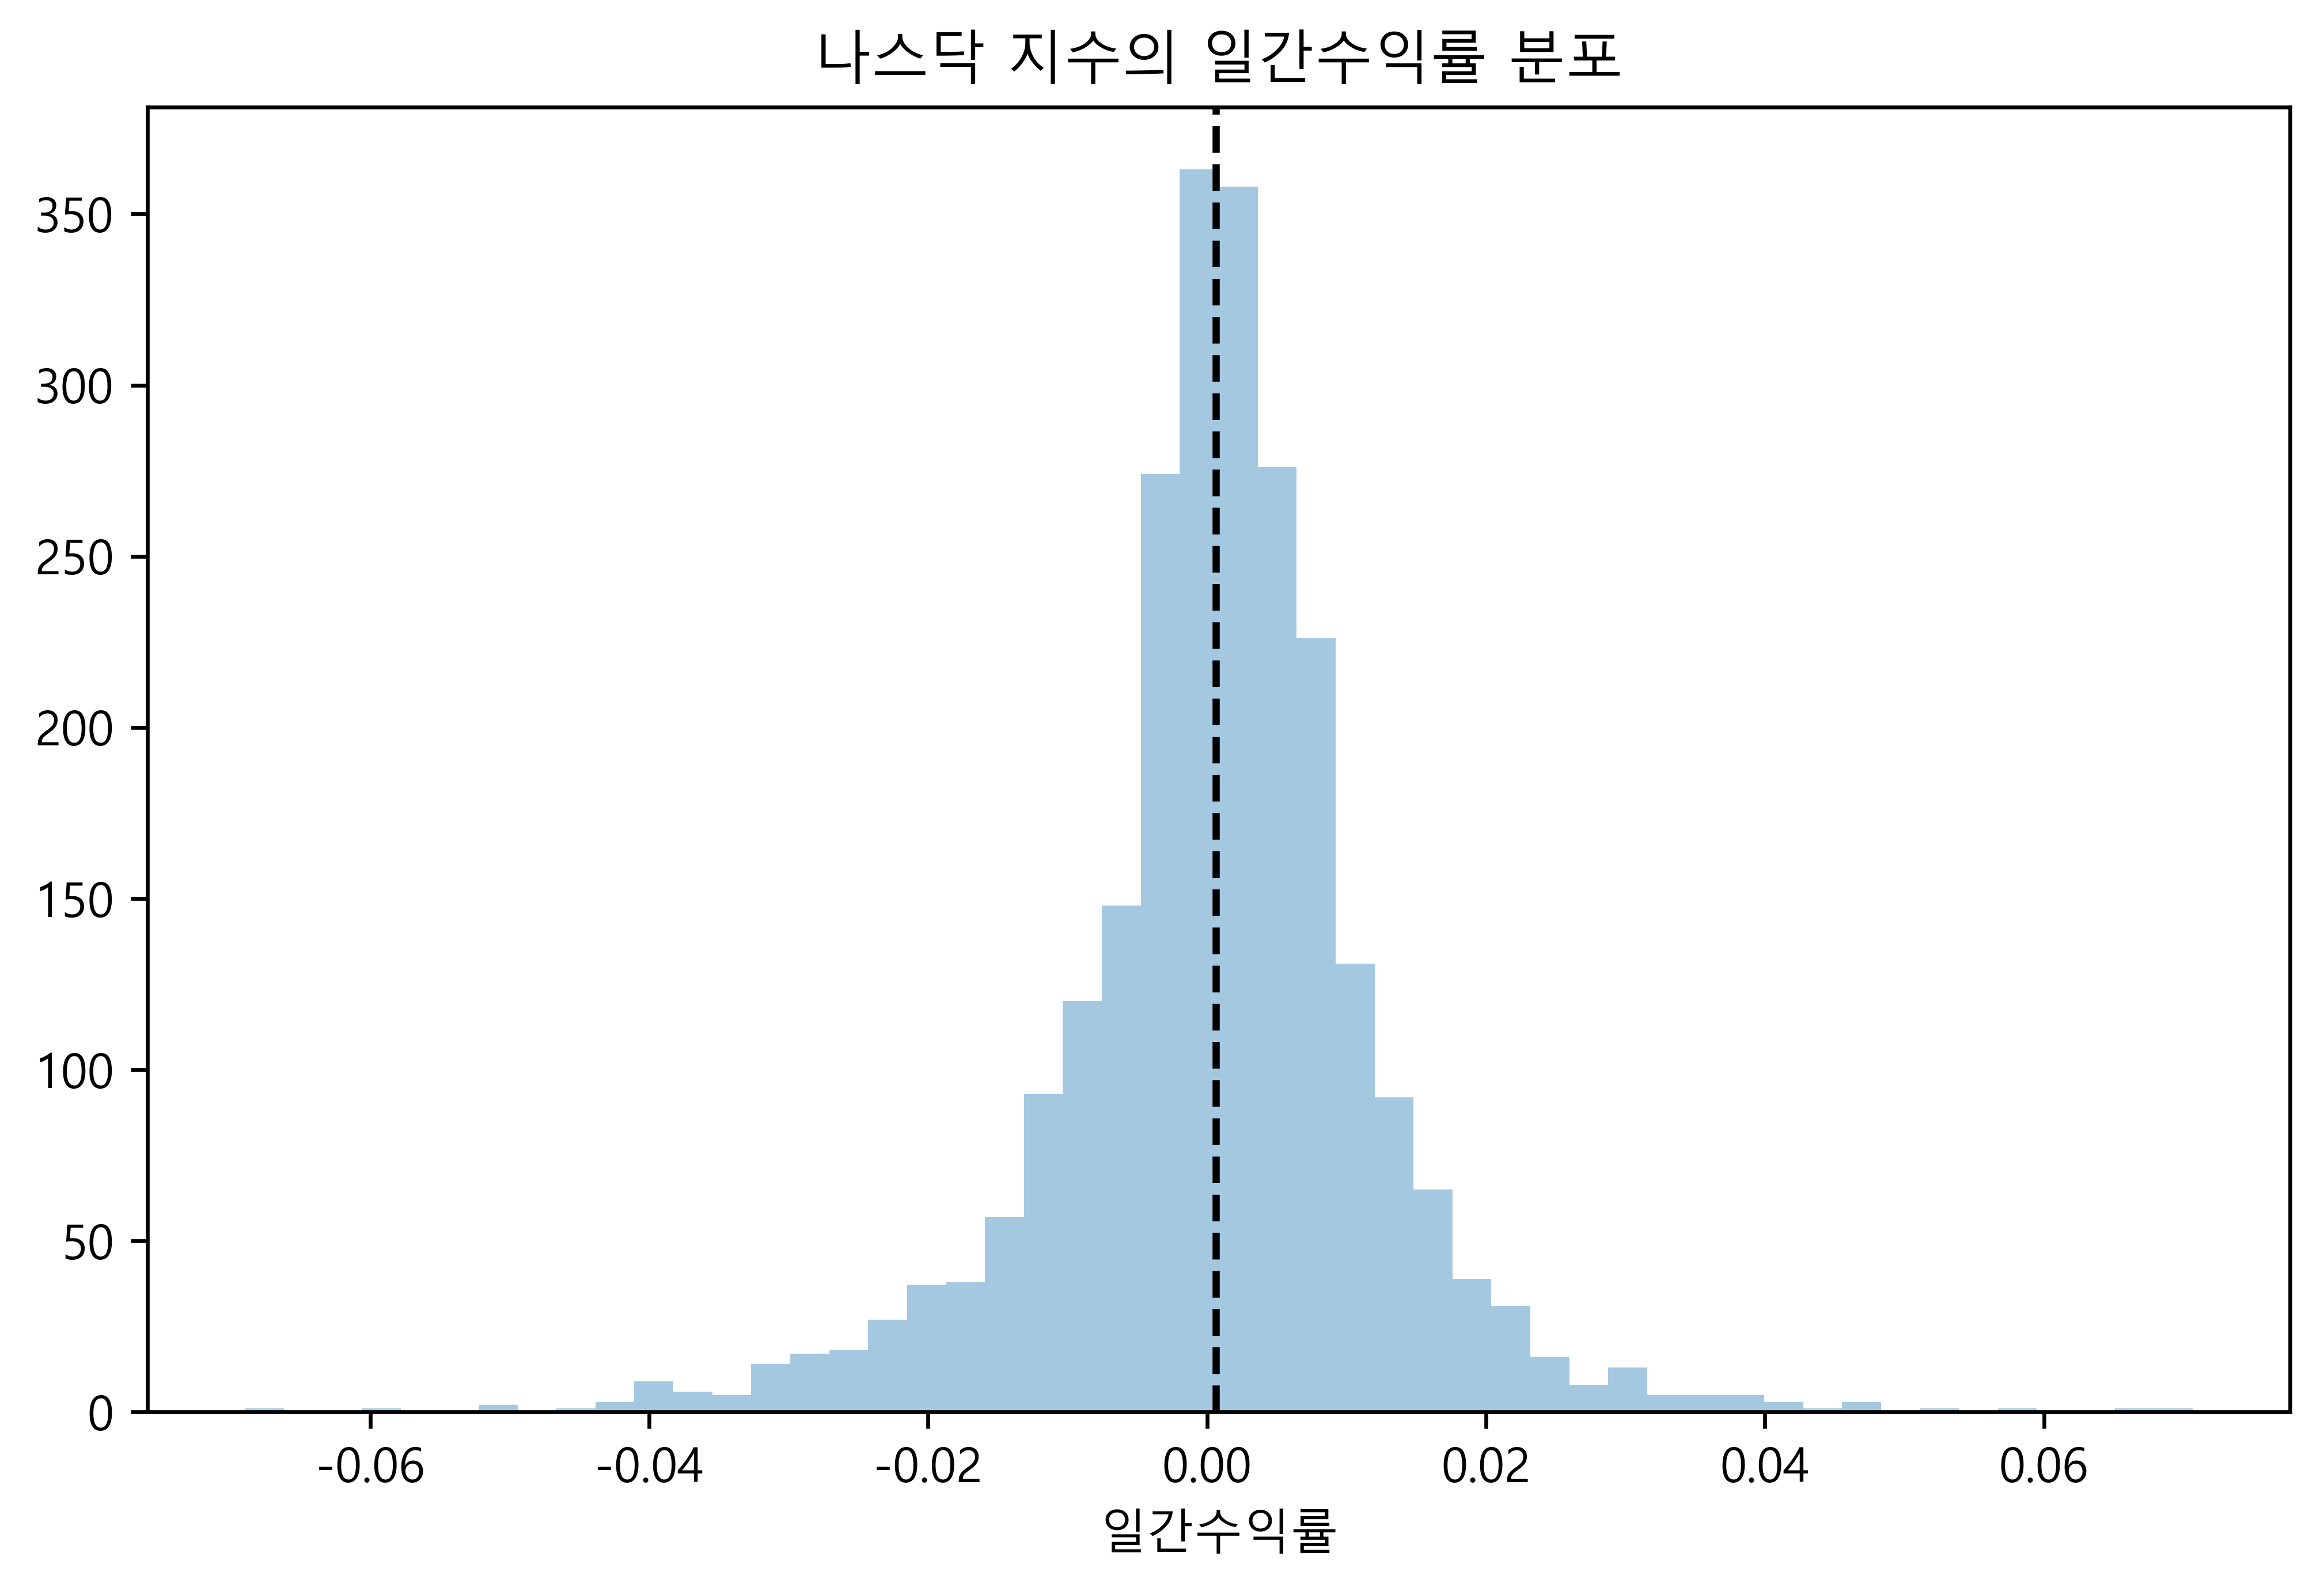

In [71]:
sns.distplot(daily_returns, kde=False)
ymin, ymax = plt.ylim()
plt.vlines(x = mean, ymin=0, ymax=ymax, ls="--")
plt.ylim(0, ymax)
plt.title("나스닥 지수의 일간수익률 분포")
plt.xlabel("일간수익률")
plt.show()

### 로그정규분포

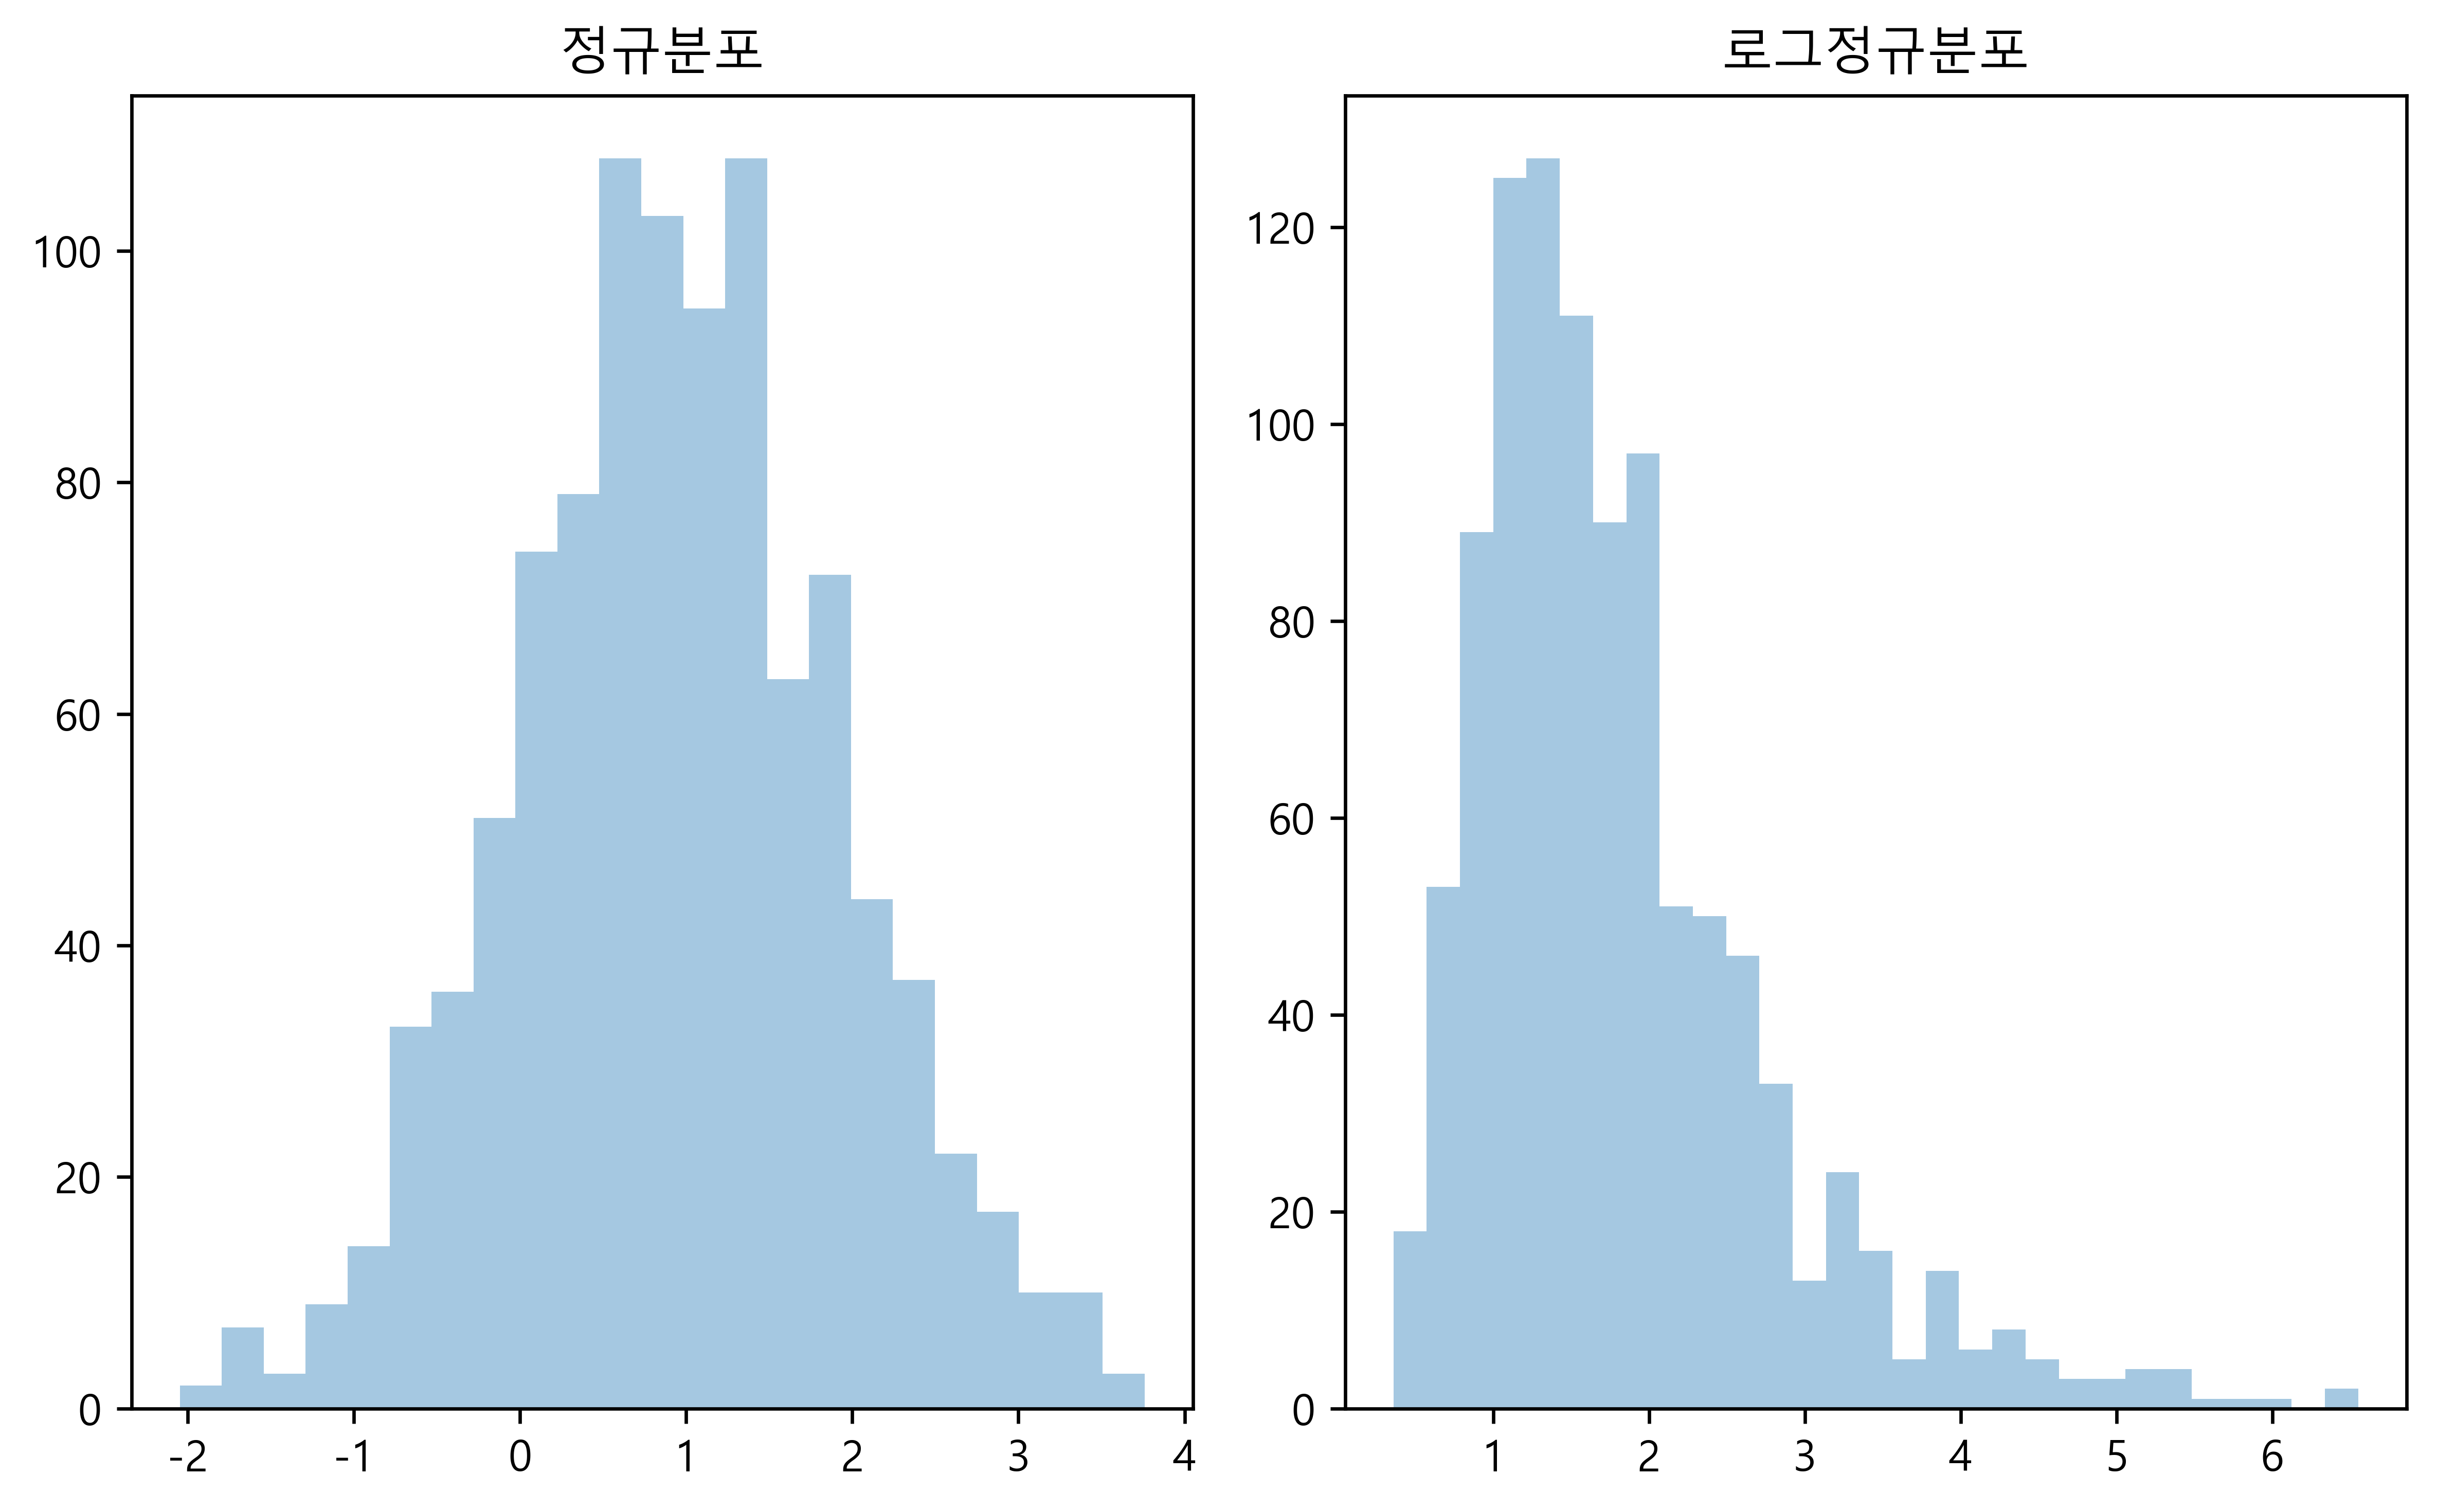

In [72]:
np.random.seed(0)
mu = 1
rv = sp.stats.norm(loc=mu)
x1 = rv.rvs(1000)
s = 0.5
x2 = np.exp(s * x1)

fig, ax = plt.subplots(1, 2)
sns.distplot(x1, kde=False, ax = ax[0])
ax[0].set_title("정규분포")
sns.distplot(x2, kde=False, ax = ax[1])
ax[1].set_title("로그정규분포")
plt.tight_layout()
plt.show()

### Q-Q 플롯

In [73]:
# 정렬
x_sorted = np.sort(x)
x_sorted

array([-0.97727788, -0.85409574, -0.20515826, -0.15135721, -0.10321885,
        0.12167502,  0.14404357,  0.3130677 ,  0.33367433,  0.40015721,
        0.4105985 ,  0.44386323,  0.76103773,  0.95008842,  0.97873798,
        1.45427351,  1.49407907,  1.76405235,  1.86755799,  2.2408932 ])

In [74]:
# 몇번째 데이터일 가능성이 가장 높은지를 찾음
# 위 값을 uniform distribution에서 추출했을 경우 첫번째 데이터는
# 전체 데이터의 하위 3%에 해당한다는 뜻
# 마지막 데이터는 상위 97%에 해당
from scipy.stats.morestats import _calc_uniform_order_statistic_medians

position = _calc_uniform_order_statistic_medians(len(x))
position

array([0.03406367, 0.08261724, 0.13172109, 0.18082494, 0.2299288 ,
       0.27903265, 0.32813651, 0.37724036, 0.42634422, 0.47544807,
       0.52455193, 0.57365578, 0.62275964, 0.67186349, 0.72096735,
       0.7700712 , 0.81917506, 0.86827891, 0.91738276, 0.96593633])

In [75]:
# 위 값을 y 축에 대입 후 cdf를 그린다
# 그 cdf에서 위의 값을 y에 대입, x를 구한다 - quantile number
# 정규분포였을 시에 해당되는 값으로 위칫값 계산을 마무리한다.
qf = rv.ppf(position)
qf

array([-0.8241636 , -0.38768012, -0.11829229,  0.08777425,  0.26091865,
        0.4142824 ,  0.55493533,  0.68726332,  0.81431072,  0.93841854,
        1.06158146,  1.18568928,  1.31273668,  1.44506467,  1.5857176 ,
        1.73908135,  1.91222575,  2.11829229,  2.38768012,  2.8241636 ])

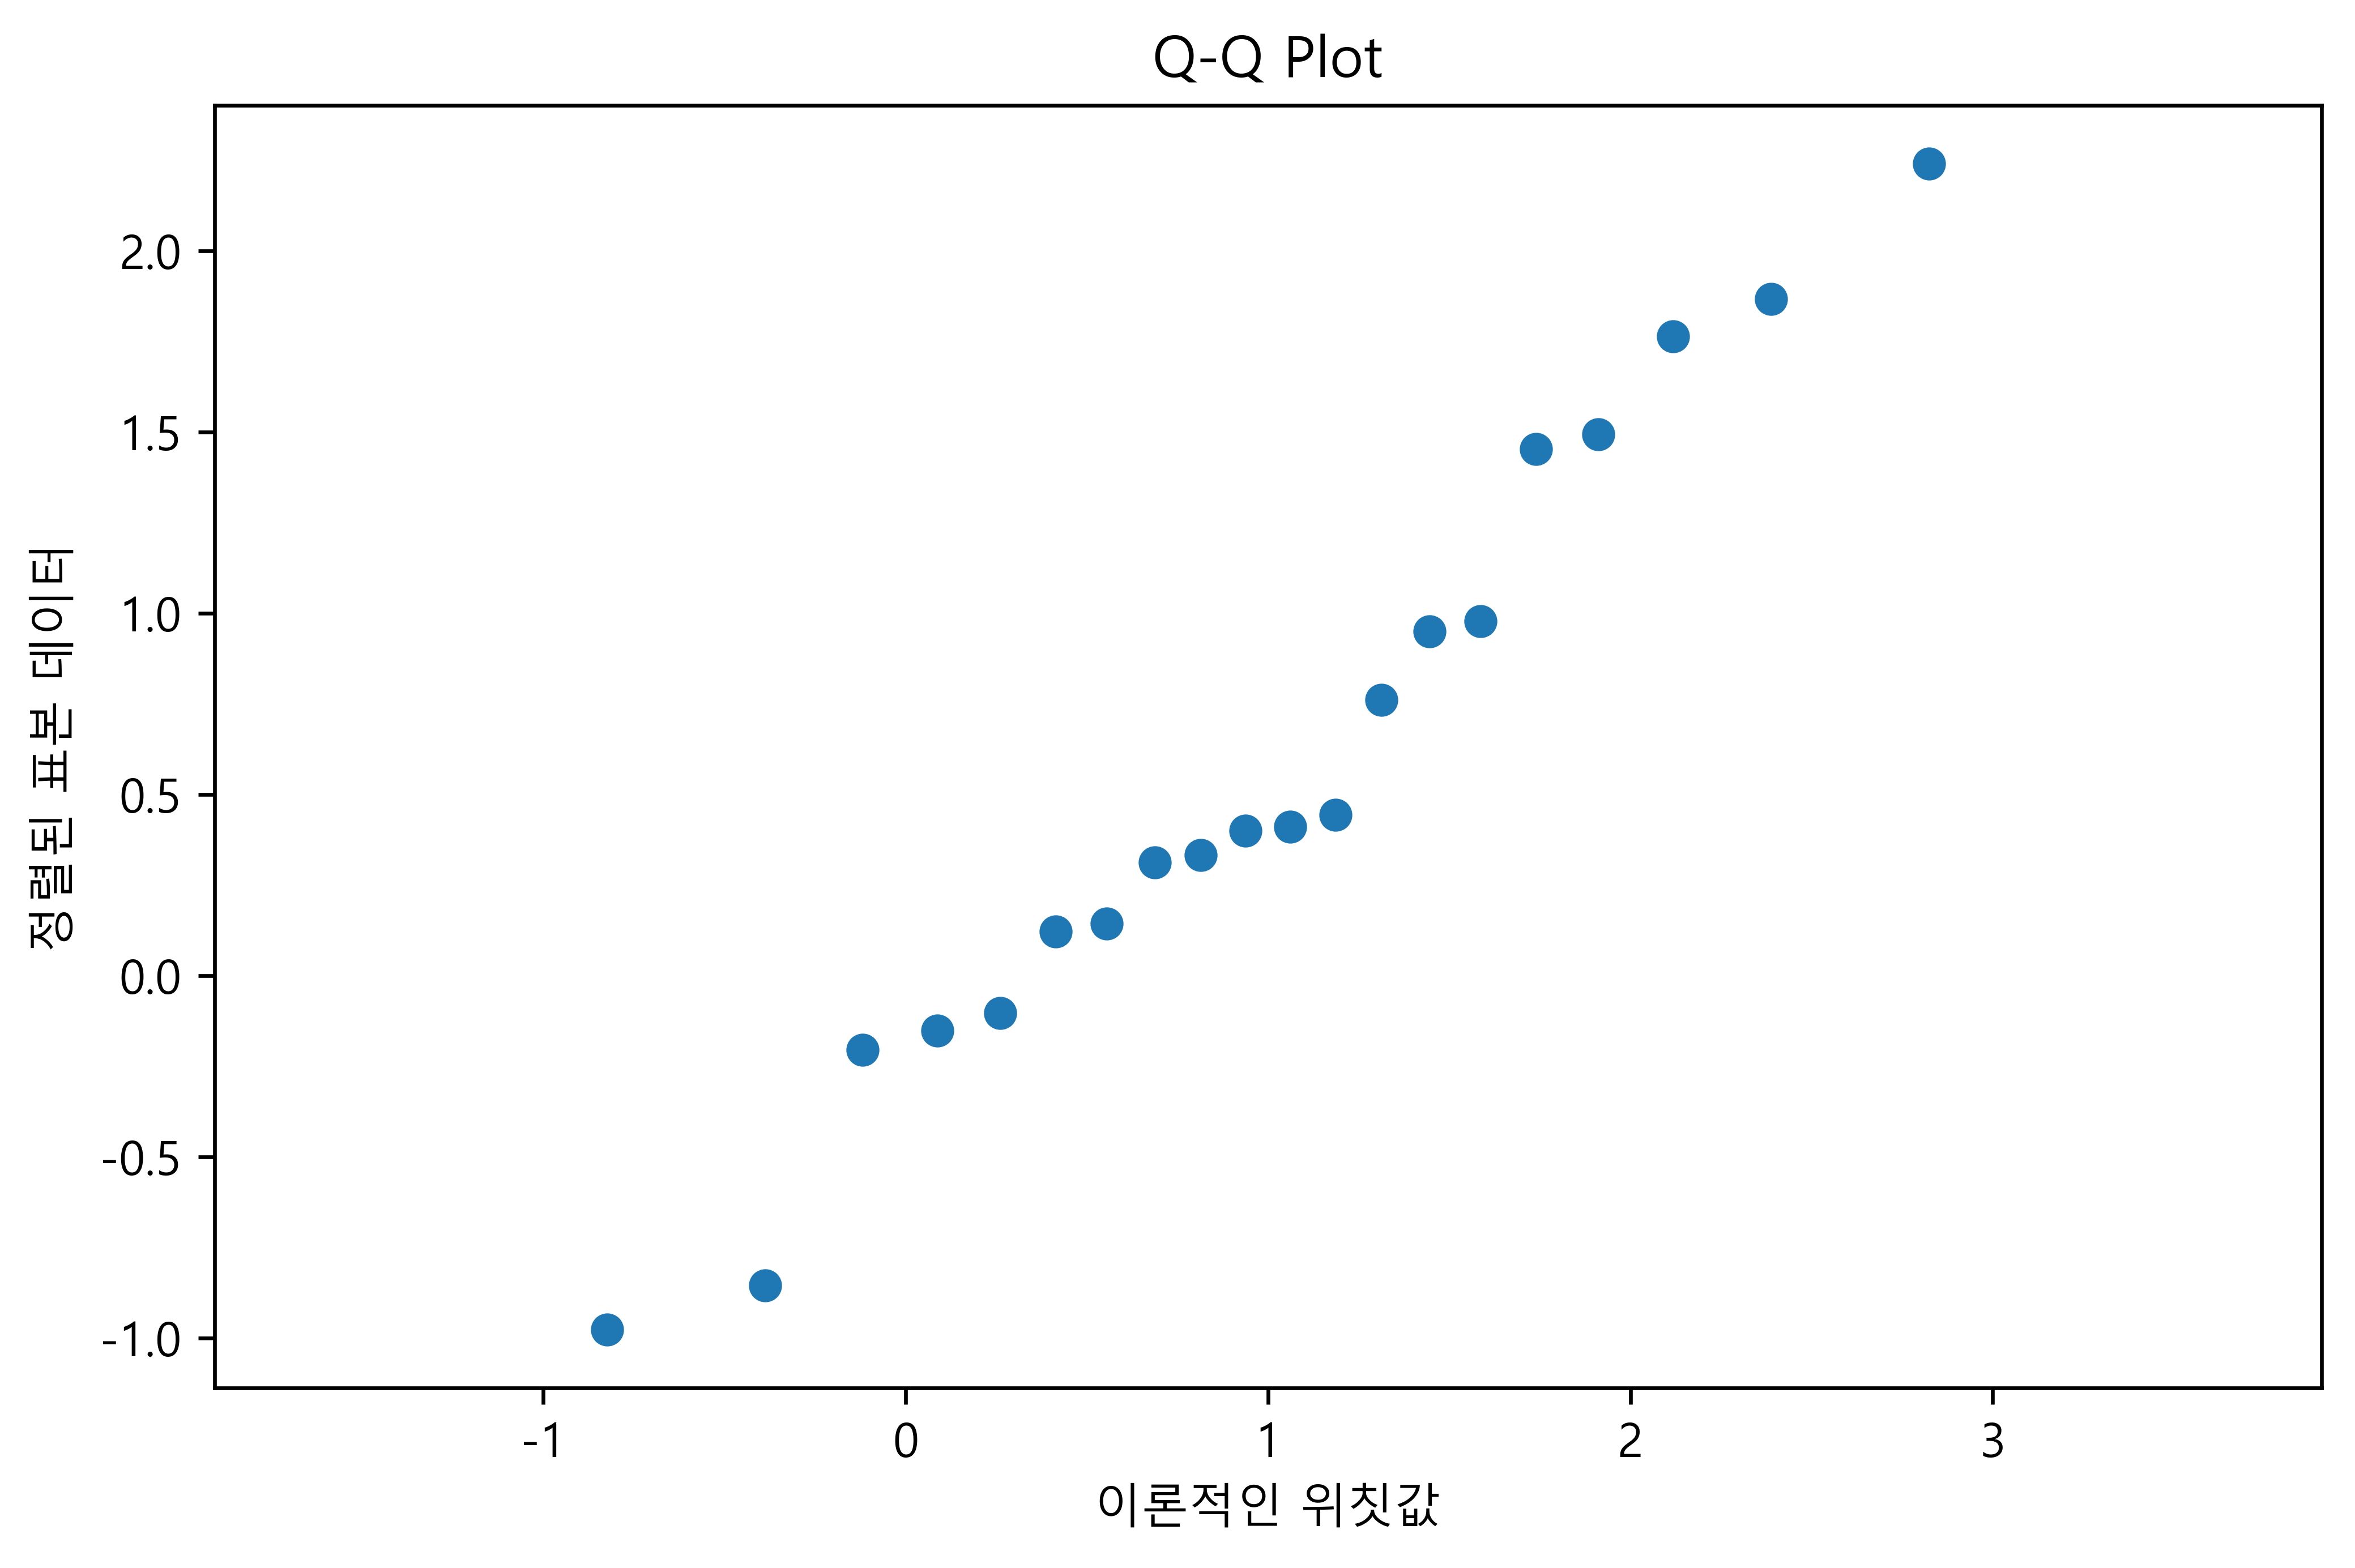

In [76]:
plt.scatter(qf, x_sorted)
plt.title("Q-Q Plot")
plt.xlabel("이론적인 위칫값")
plt.ylabel("정렬된 표본 데이터")
plt.axis("equal")
plt.show()

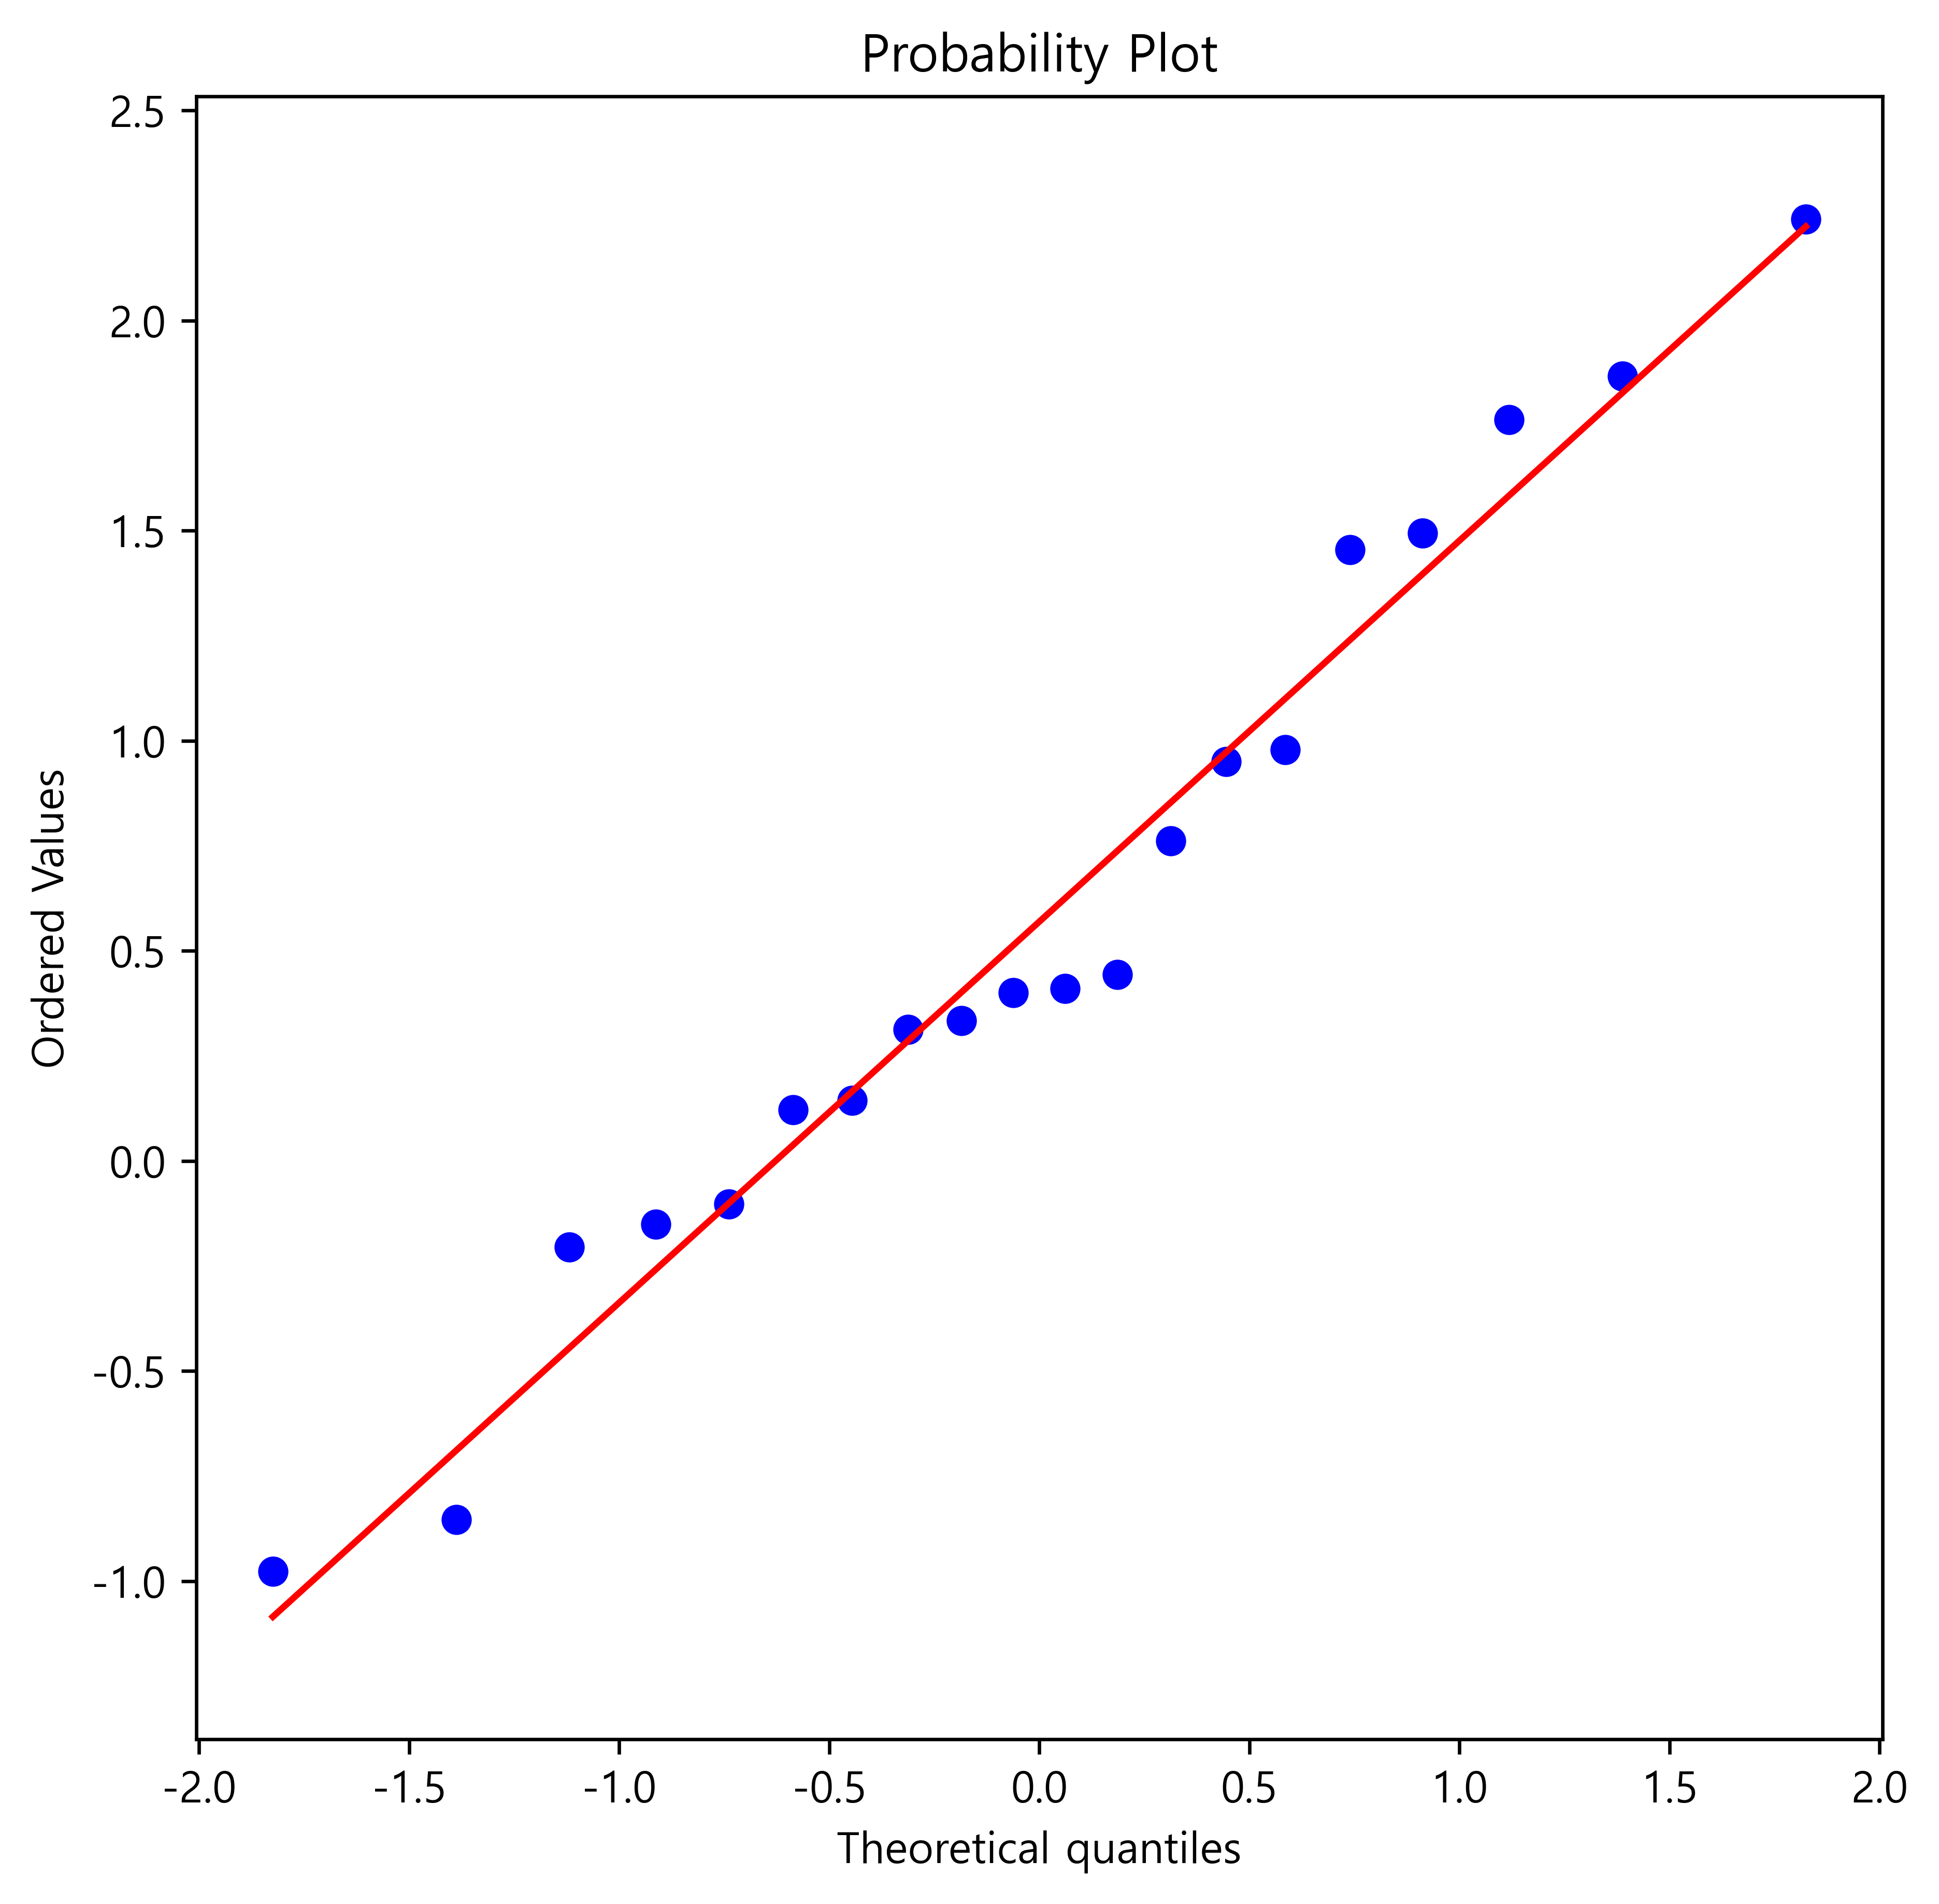

In [77]:
np.random.seed(0)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

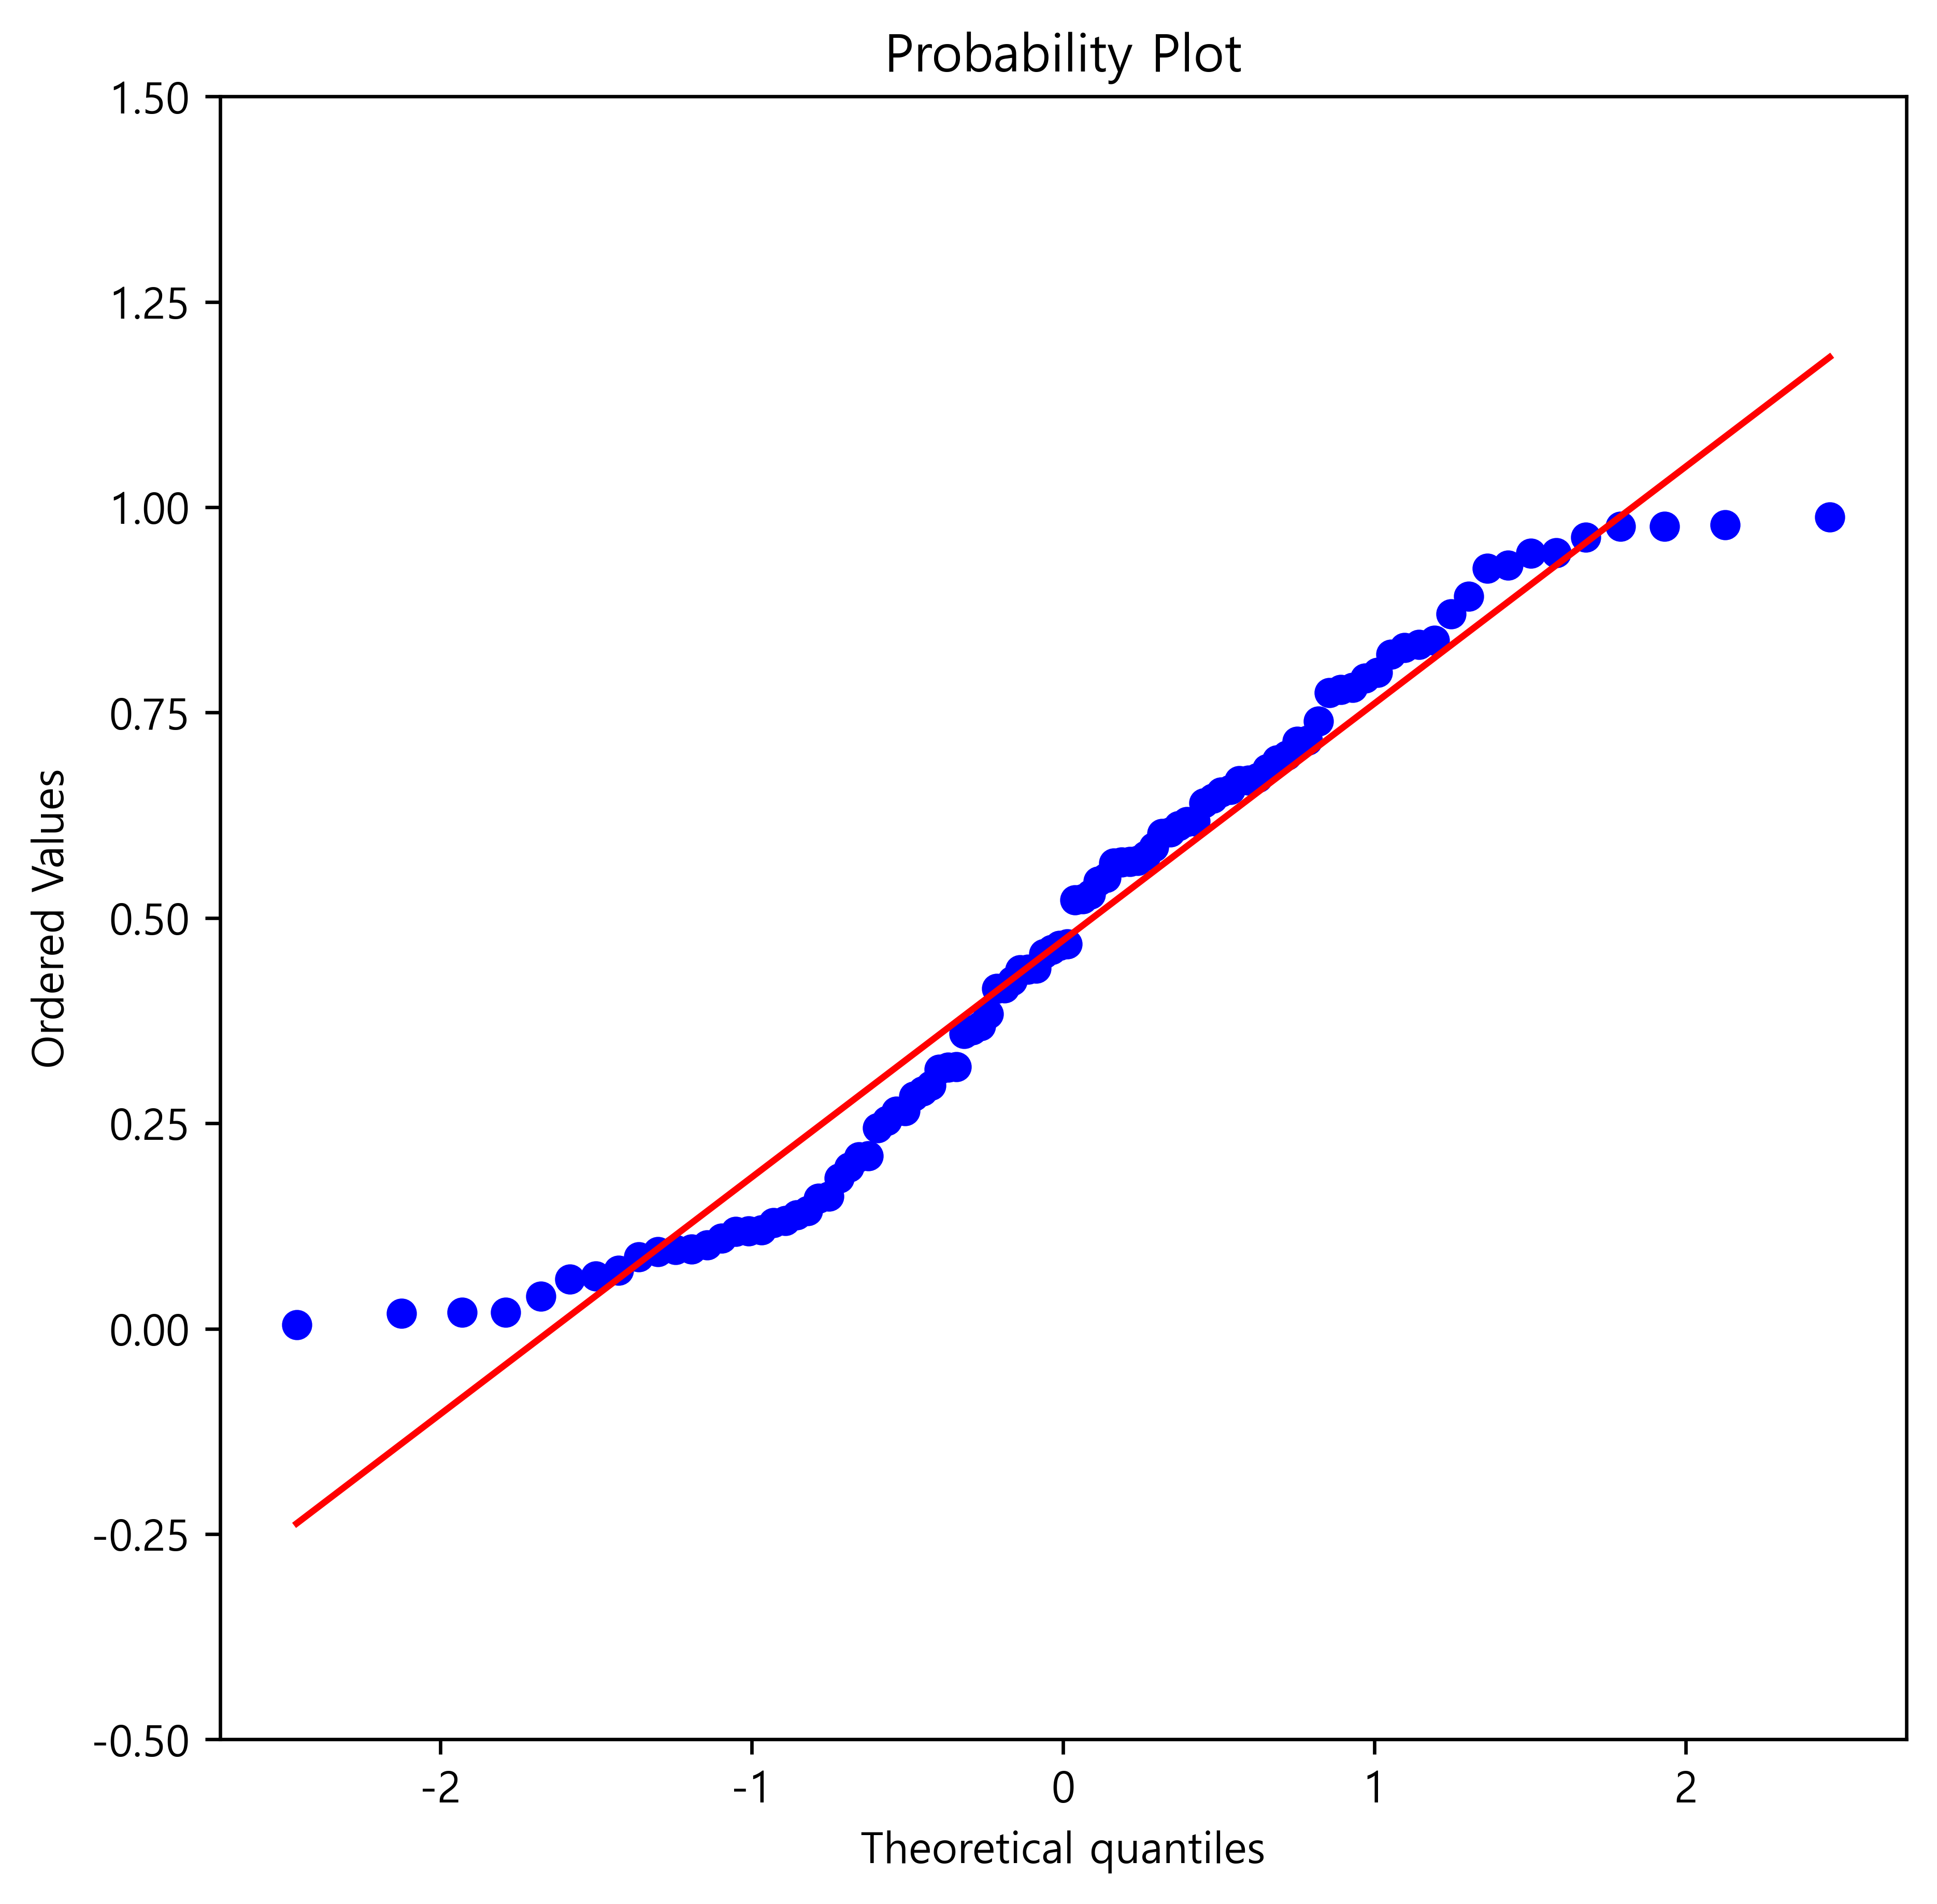

In [78]:
np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.show()

### 중심극한정리

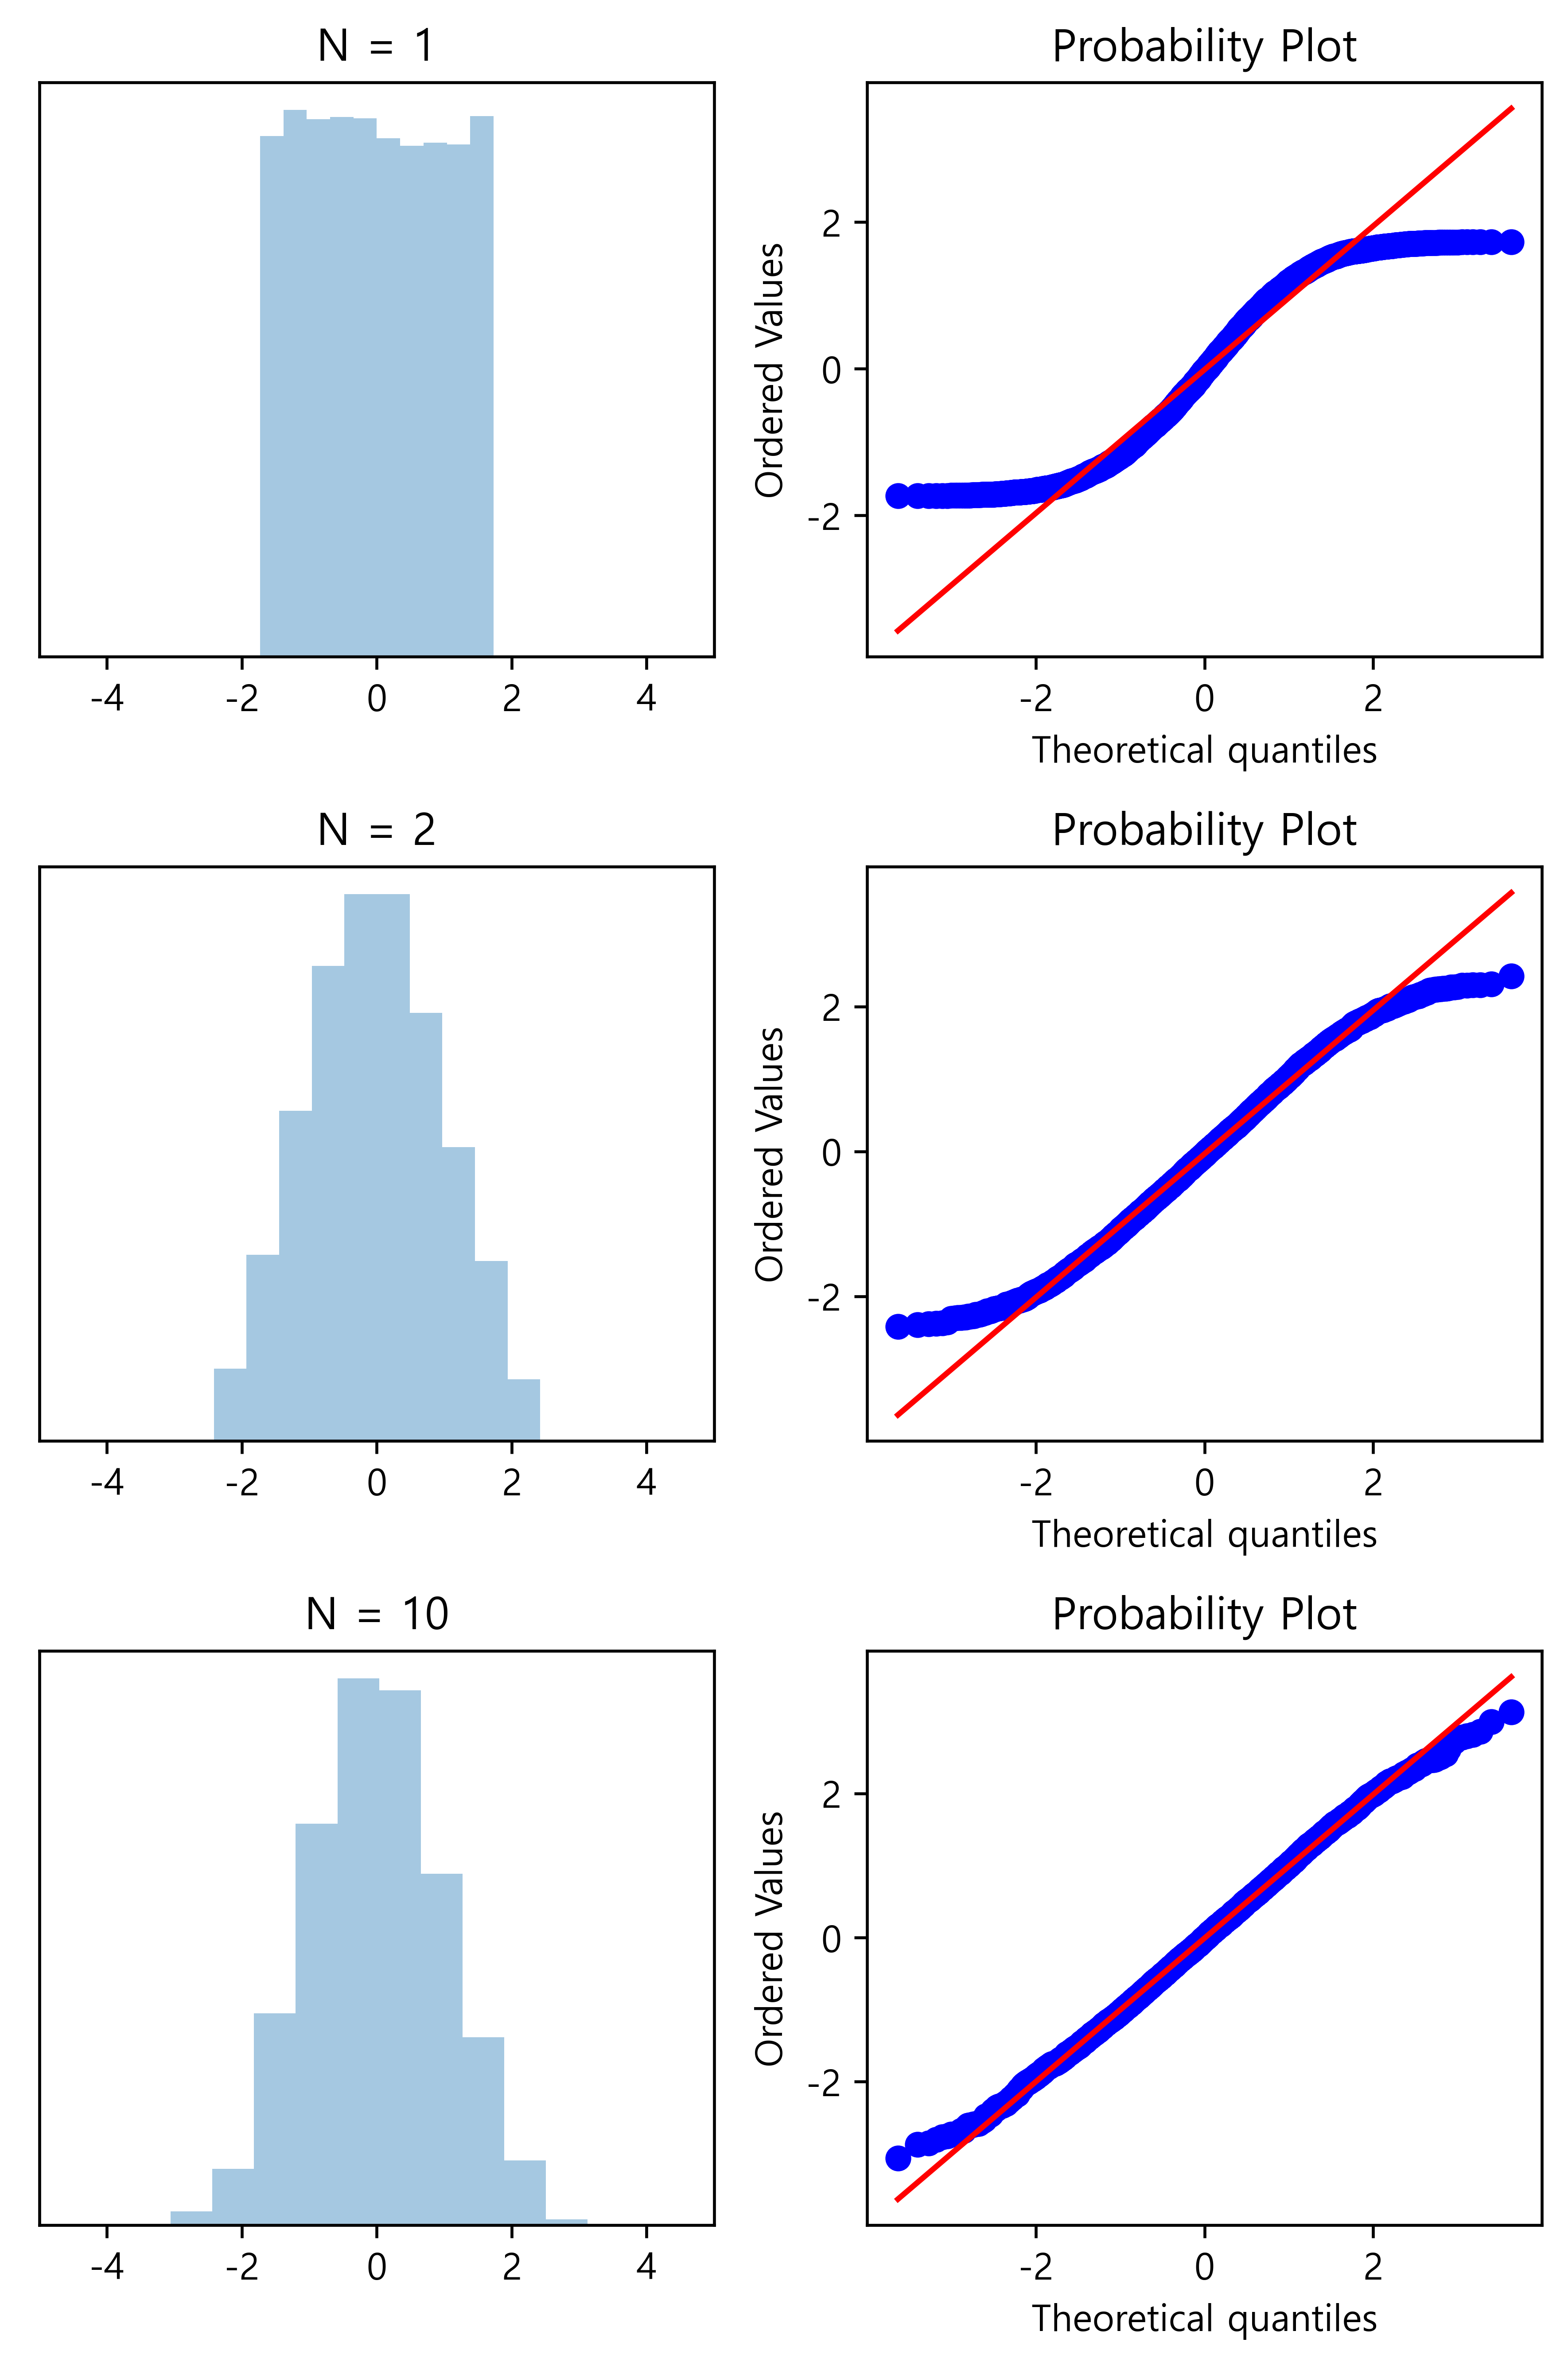

In [32]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100)

plt.figure(figsize=(6, 9))

for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    ax.set_title("N = {0}".format(N))
    plt.subplot(3, 2, 2 * i + 2)
    sp.stats.probplot(Xbar, plot=plt)
    
plt.tight_layout()
plt.show()

N이 커질수록 정규분포에 가까워진다

### 연습 문제 8.4.3
정규분포로부터 나온 N개의 표본의 표본평균이 정규분포가 된다는 것을 시뮬레이션과 Q-Q 플롯을 사용하여 보여라.

1. N = 2
2. N = 10

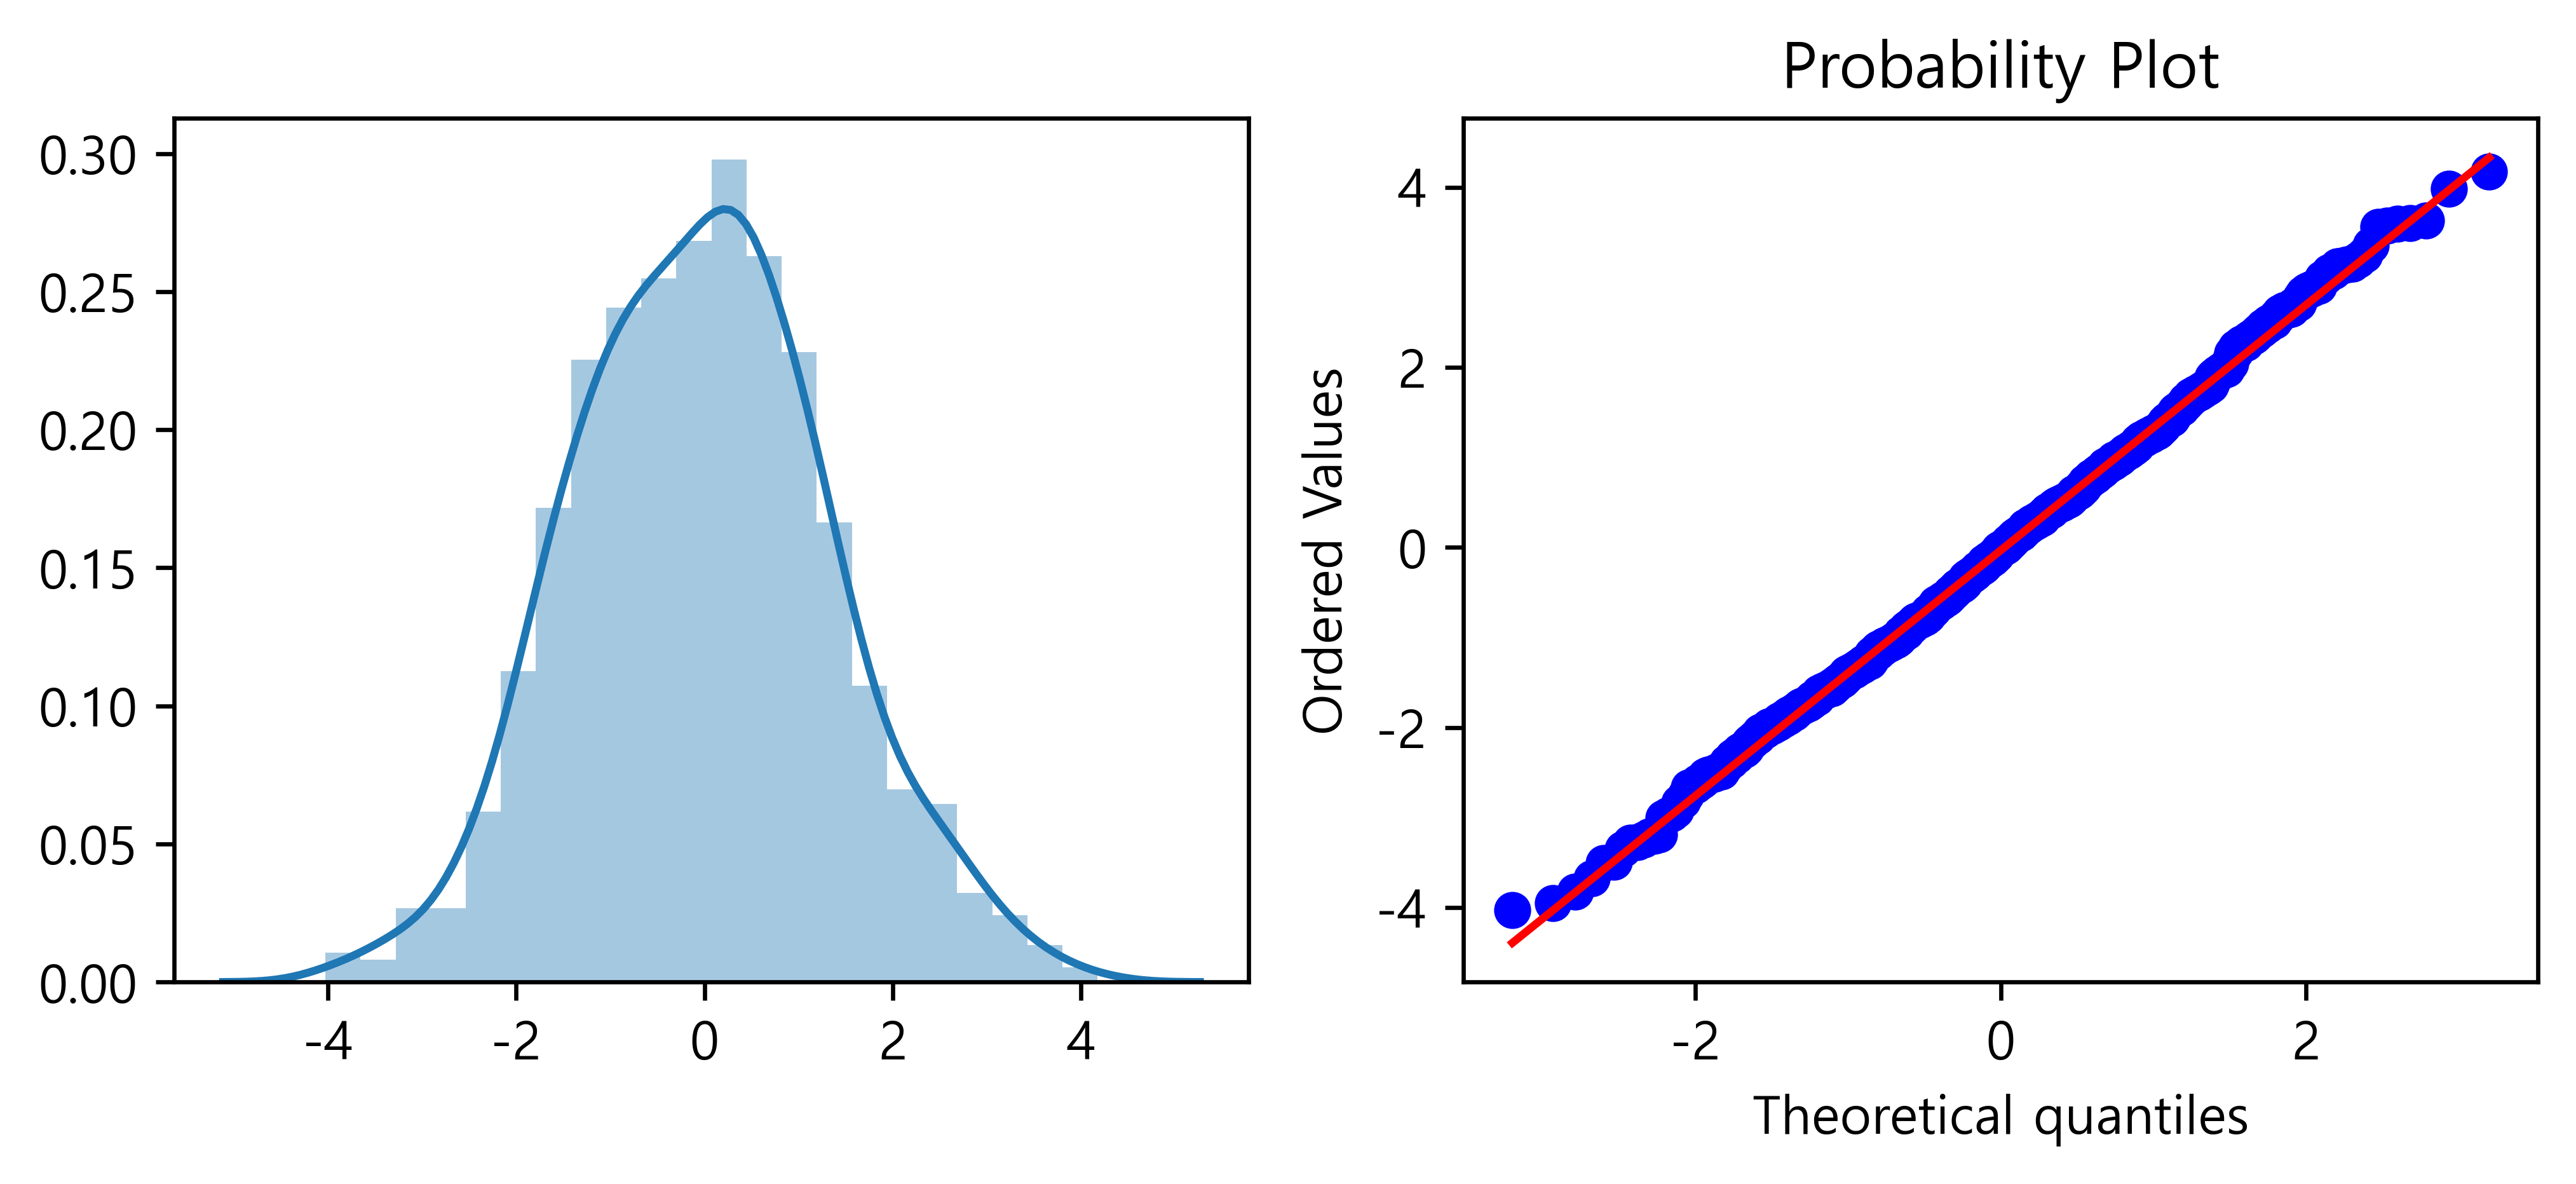

In [37]:
# 1
N = 2
M = 1000
np.random.seed(0)
x = np.random.normal(size=(N, M))
s = x.sum(axis=0)

plt.figure(figsize=(8, 3))
plt.subplot(121)
sns.distplot(s)
plt.subplot(122)
sp.stats.probplot(s, plot=plt)
plt.show()

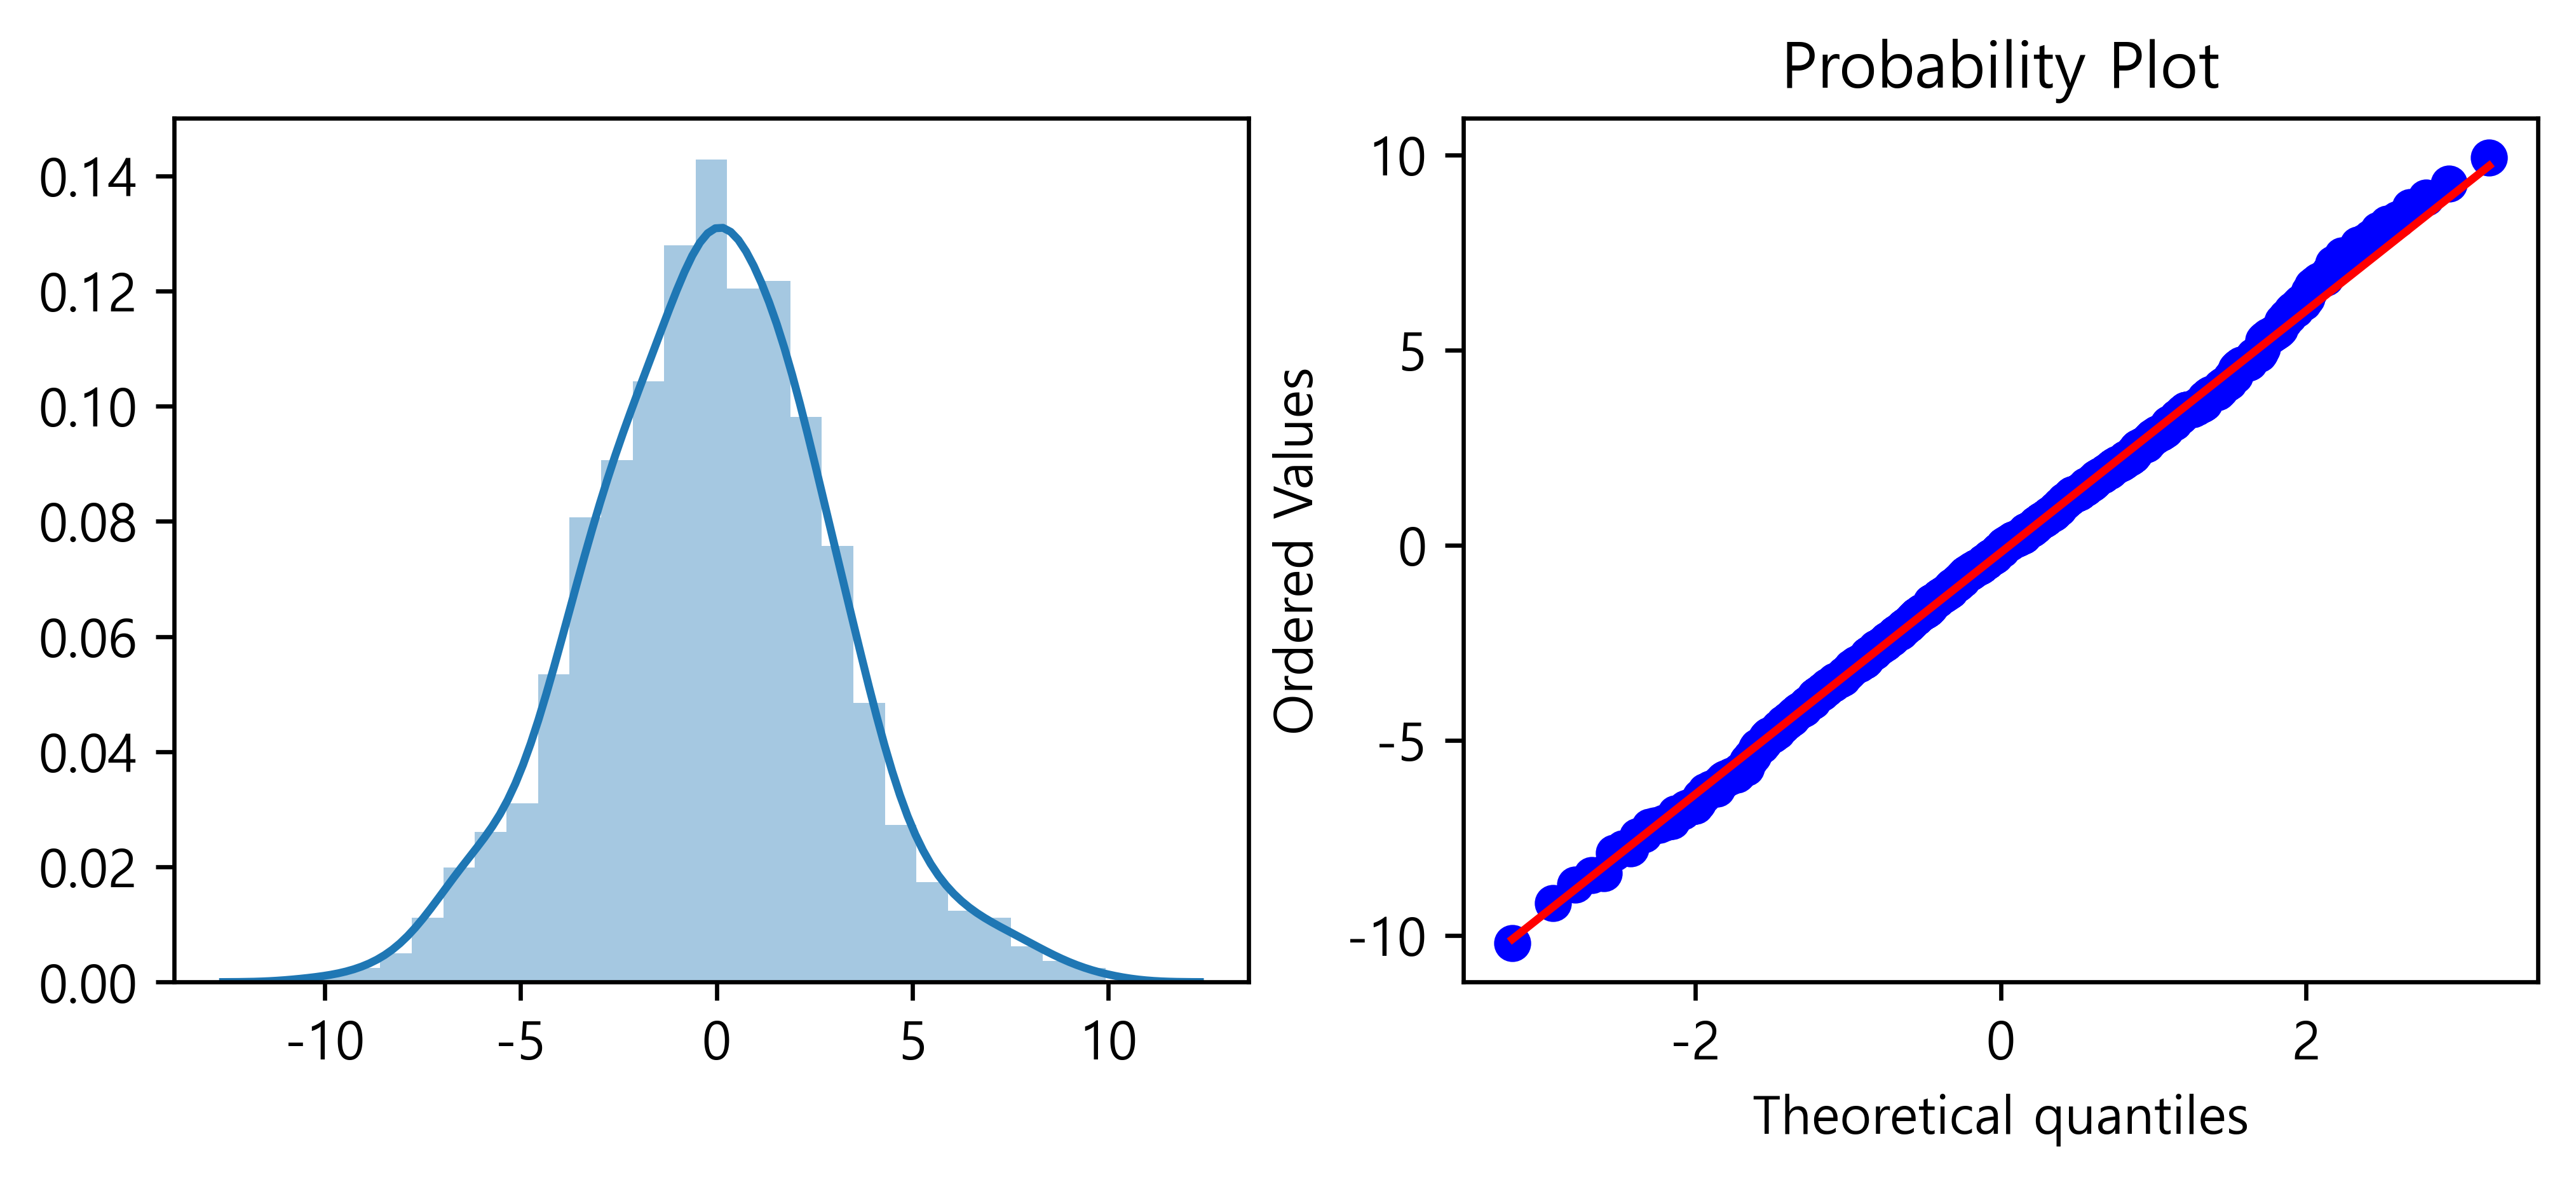

In [38]:
# 2
N = 10
M = 1000
np.random.seed(0)
x = np.random.normal(size=(N, M))
s = x.sum(axis=0)

plt.figure(figsize=(8, 3))
plt.subplot(121)
sns.distplot(s)
plt.subplot(122)
sp.stats.probplot(s, plot=plt)
plt.show()